## King County Housing Project

Please fill out:
* Student name: Yesim Cebeci
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Business Understanding

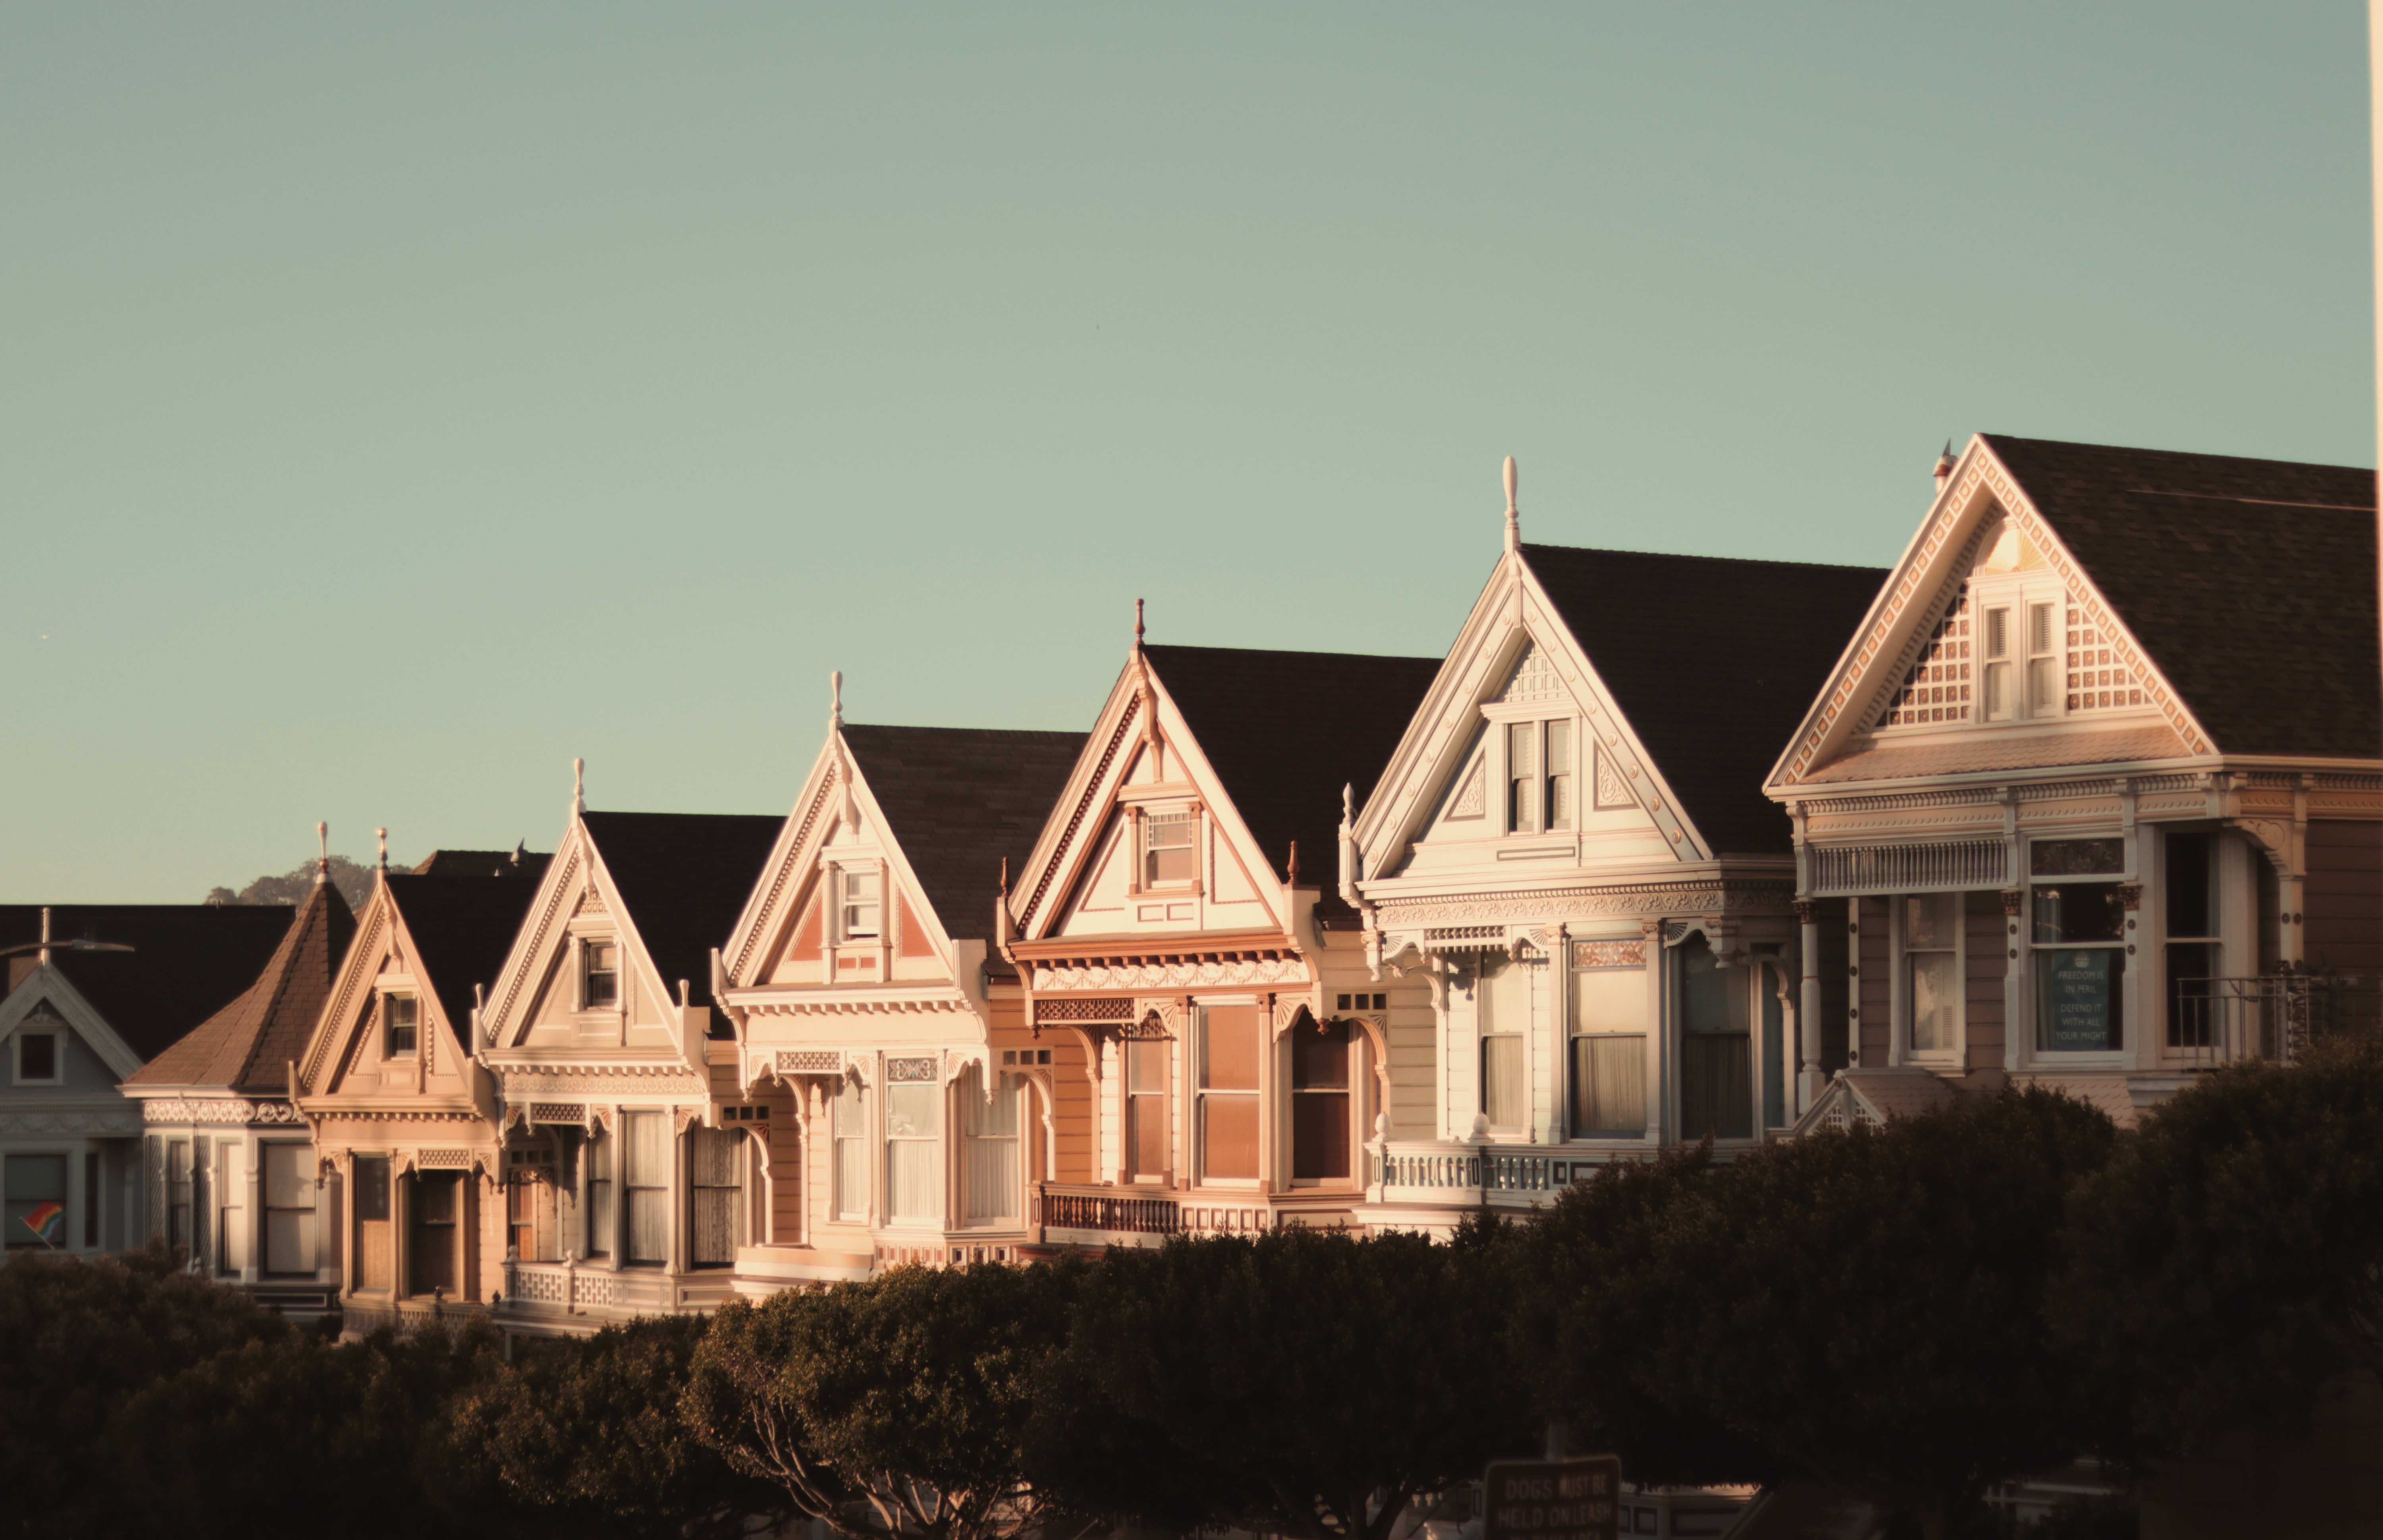

We have been approached by an investor wants to invest real estate business about how to accurately appraise homes in Kings County so that they can have idea about home prices it comes to buying and selling homes. We've been given a data set that contains various information about the different homes within Kings County.
In this study,we hope to highlight the features available to us in the data that were the most indicative of a property's sale and buy prices.

The highly correlated predictors were determined from the dataset. All assumptions of the multile linear regression were checked, and an optimal final model was achieved by keeping the most influential features only. Based on the multiple linear regression model `grade`, `sqft living area`,`floors`,`sqft_living15` and `bathrooms` were found to be important features that drive the overall sale price of a house in King County.

# Data Understanding and Preparation

The data provided to us consist of information pertaining to over 20,000 house sales carried out between 2014 and 2015, located in the `data/kc_house_data.csv` file in this repository.data dictionary summarizing the information contained in each of the 20 relevant features, not including the id column which can be discarded for our purposes. 

### Data Understanding

The dataset includes 21 assessment parameters which describes every aspect of homes in King County. These variables focus on the quality and quantity of the physical attributes of a property.

Column Names and Descriptions for Data Set

- `id` - Unique identifier for a house
- `date` - Date house was sold
- `price` - Sale price (prediction target)
- `bedrooms` - Number of bedrooms
- `bathrooms` - Number of bathrooms
- `sqft_living` - Square footage of living space in the home
- `sqft_lot` - Square footage of the lot
- `floors` - Number of floors (levels) in house
- `waterfront` - Whether the house is on a waterfront
- `view` - Quality of view from house
- `condition` - How good the overall condition of the house is. Related to maintenance of house.
- `grade` - Overall grade of the house. Related to the construction and design of the house.
- `sqft_above` - Square footage of house apart from basement
- `sqft_basement` - Square footage of the basement
- `yr_built` - Year when house was built
- `yr_renovated` - Year when house was renovated
- `zipcode` - ZIP Code used by the United States Postal Service
- `lat`- Latitude coordinate
- `long` - Longitude coordinate
- `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

### Importing Libraries

First we install the necessary packages that we will need going forward with our exploration

In [1]:
import pandas as pd
import numpy as np

# Statistical Modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats


#SKlearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')



### Loading Dataset

In [2]:
data = pd.read_csv('data/kc_house_data.csv')
display(data.head())
display(data.info())

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

- Using `.info()` we take a look at what our dataset looks like. After checking data set , it needs to be convert object values to int64 or float64 and fill the nulls to proper values

- Null values found in `waterfront`, `view`, and `yr_renovated`.

In [3]:
# Checking ordinal, categorical and numeric values

for col in data.columns:
    print('{} : {}'.format(col, data[col].nunique()))

id : 21420
date : 372
price : 3622
bedrooms : 12
bathrooms : 29
sqft_living : 1034
sqft_lot : 9776
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 11
sqft_above : 942
sqft_basement : 304
yr_built : 116
yr_renovated : 70
zipcode : 70
lat : 5033
long : 751
sqft_living15 : 777
sqft_lot15 : 8682


### Data Preparing

In [4]:
# Checking the null values

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# i ll check the values for the nulls so that i can fill the nulls proper way

data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [6]:
#waterfront has overwhelmingly NO values so that i can fill the nulls with the NO

data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [7]:
#as we can see here , yr_renovsted has mostly 0.0 values so that i can fill the nulls with the 0.0

data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [8]:
#Just checking the categorical values in order to convert it to numeric numbers

data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [9]:
#condition feature also categorial variables 

data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [10]:
#Because of the ? values , sqft_basement values are object so i will replace the ? values with 0.0 then
# i can convert the values object to numbers 

data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

- As we can see here, we have some object values
- Date column needs to be converted object to DateTime
- Waterfront column has 2376 null, 19075 NO and 146 YES values and we need to convert value to binary values
- In view ,90% of the values are none and null. The remaining values are not significant enough to remain in our model.
- Condition and grade columns need to be converted to numerical ordered values
- In sqft_basement, there is 12826 null and 454 '?' (about 61% of data) values.I will replace '?' with a 0 and convert it object to float
- In yr_renovated 97% of vales are either null or 0.0 (17011 0 and 3842 'null' ).It wont be significant enough to remain in our model.

### Cleaning Data

In [11]:
#Converting all the nulls in waterfront column, i will fill the nulls with the "NO" because 
# it is overwhelmingly the most common value

#  data['waterfront'] = data['waterfront'].fillna('NO')

#in view column, i will fill the nulls with the "NONE"
data['view'] = data['view'].fillna('NONE')

#in yr_renovated column, i will fill the nulls with the "0.0"
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)
data['renovated'] = data['yr_renovated'].apply(lambda x:0 if x ==0.0 else 1)

# Converting data types to numbers

#date 
data['date'] =pd.to_datetime(data['date'])
data['yr_sold'] = data['date'].map(lambda x:x.year)

# waterfront 
data['waterfront'] = data['waterfront'].apply(lambda x:0 if x =='NO' else 1)

#view 
v = {'NONE':0, 'FAIR':1, 'AVERAGE':2,'GOOD':3 , 'EXCELLENT':4}
data['view'] = data['view'].map(v)

#condition
c = {'Poor':0, 'Fair':1,'Average':2 ,'Good':3 , 'Very Good':4}
data['condition'] = data['condition'].map(c)

#grade
data['grade'] = data['grade'].map(lambda x: int(x.split(' ')[0]))

#sqft_basement
data['sqft_basement'] = data['sqft_basement'].replace('?','0.0').astype(float)

#Creating new column 'age of sale'
data['age_at_sale'] = data['yr_sold'] - data['yr_built']

#drop the columns which not interested in

data.drop(['id','date','yr_built','yr_sold','yr_renovated','zipcode','lat','long','waterfront'], axis =1, inplace= True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
 13  renovated      21597 non-null  int64  
 14  age_at_sale    21597 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.5 MB


In [13]:
# 5 point statistical summary
data.describe().T

count           mean            std      min        25%  \
price          21597.0  540296.573506  367368.140101  78000.0  322000.00   
bedrooms       21597.0       3.373200       0.926299      1.0       3.00   
bathrooms      21597.0       2.115826       0.768984      0.5       1.75   
sqft_living    21597.0    2080.321850     918.106125    370.0    1430.00   
sqft_lot       21597.0   15099.408760   41412.636876    520.0    5040.00   
floors         21597.0       1.494096       0.539683      1.0       1.00   
view           21597.0       0.233181       0.764673      0.0       0.00   
condition      21597.0       2.409825       0.650546      0.0       2.00   
grade          21597.0       7.657915       1.173200      3.0       7.00   
sqft_above     21597.0    1788.596842     827.759761    370.0    1190.00   
sqft_basement  21597.0     285.716581     439.819830      0.0       0.00   
sqft_living15  21597.0    1986.620318     685.230472    399.0    1490.00   
sqft_lot15     21597.0   12758.283512   27274.441950    651.0    5100.00   
renovated      21597.0       0.034449       0.182384      0.0       0.00   
age_at_sale    21597.0      43.323286      29.377285     -1.0      18.00   

                     50%       75%        max  
price          450000.00  645000.0  7700000.0  
bedrooms            3.00       4.0       33.0  
bathrooms           2.25       2.5        8.0  
sqft_living      1910.00    2550.0    13540.0  
sqft_lot         7618.00   10685.0  1651359.0  
floors              1.50       2.0        3.5  
view                0.00       0.0        4.0  
condition           2.00       3.0        4.0  
grade               7.00       8.0       13.0  
sqft_above       1560.00    2210.0     9410.0  
sqft_basement       0.00     550.0     4820.0  
sqft_living15    1840.00    2360.0     6210.0  
sqft_lot15       7620.00   10083.0   871200.0  
renovated           0.00       0.0        1.0  
age_at_sale        40.00      63.0      115.0

- As we can see in `price`, `bedrooms`, `bathrooms`, `sqrt_living`, `sqft_lot`  maximum values are very significantly larger than the mean. We will look further into the column to evaluate outliers.


Now we have a dataset that contains 15
features in a numeric form.These variables focus on the quality and quantity of the physical attributes of a property. I can start built model for inference to study the relationship between the price and other variables.

### Visualization

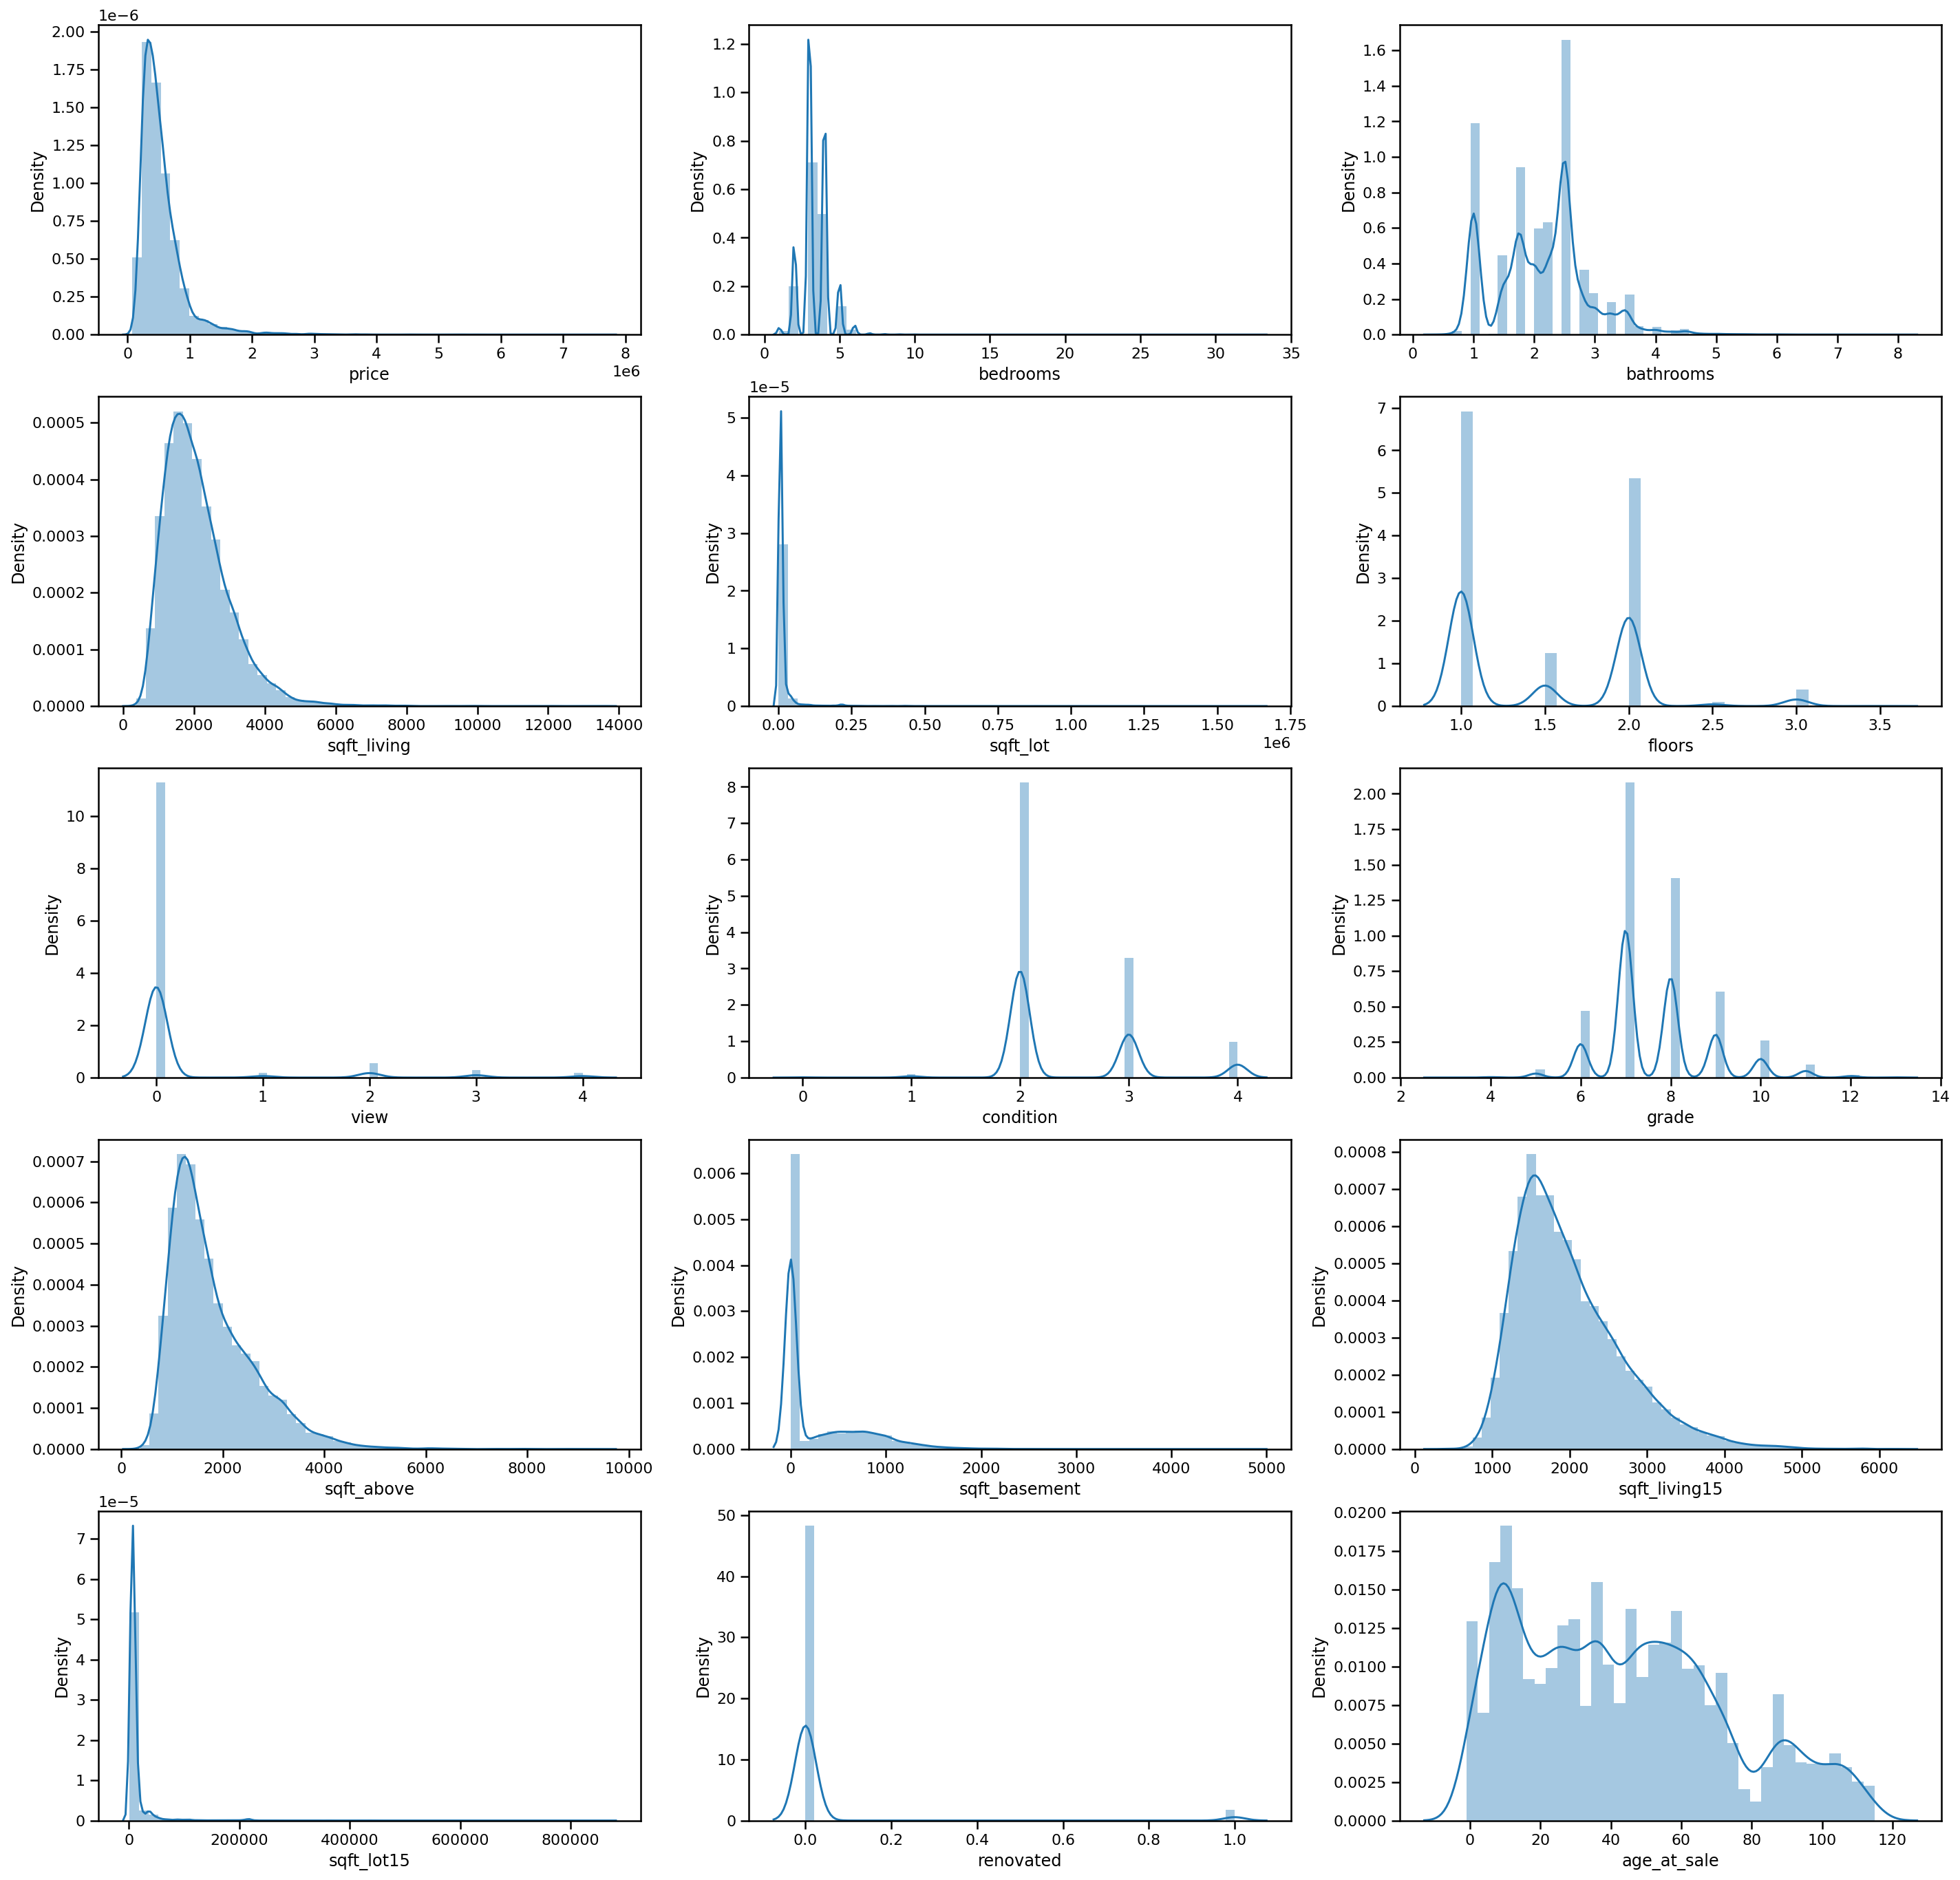

In [14]:
fig, ax = plt.subplots(nrows=5,ncols =3, figsize=(24,24))
col = 0
column = data.columns
for i in range(5):
    for j in range(3):
        sns.distplot(data[column[col]], ax=ax[i][j])
        ax[i][j]
        col+=1
plt.show()


- From the first observation we can see that most variables skewed right direction
- Most frequent bedrooms are 3,4 
- Most frequnet bathrooms are between 2 and 3
- Most of them first level
- And also overvhelmingly most of them has no view 
- Most of them have avarage condition
- Grade interval mostly between 6-10
- Most of the properties are not renovated 
- And last, most of property have no basement

Now we'll focus on our target price column and examine its relation with other columns in order to 
identify potential predictors for our first model.


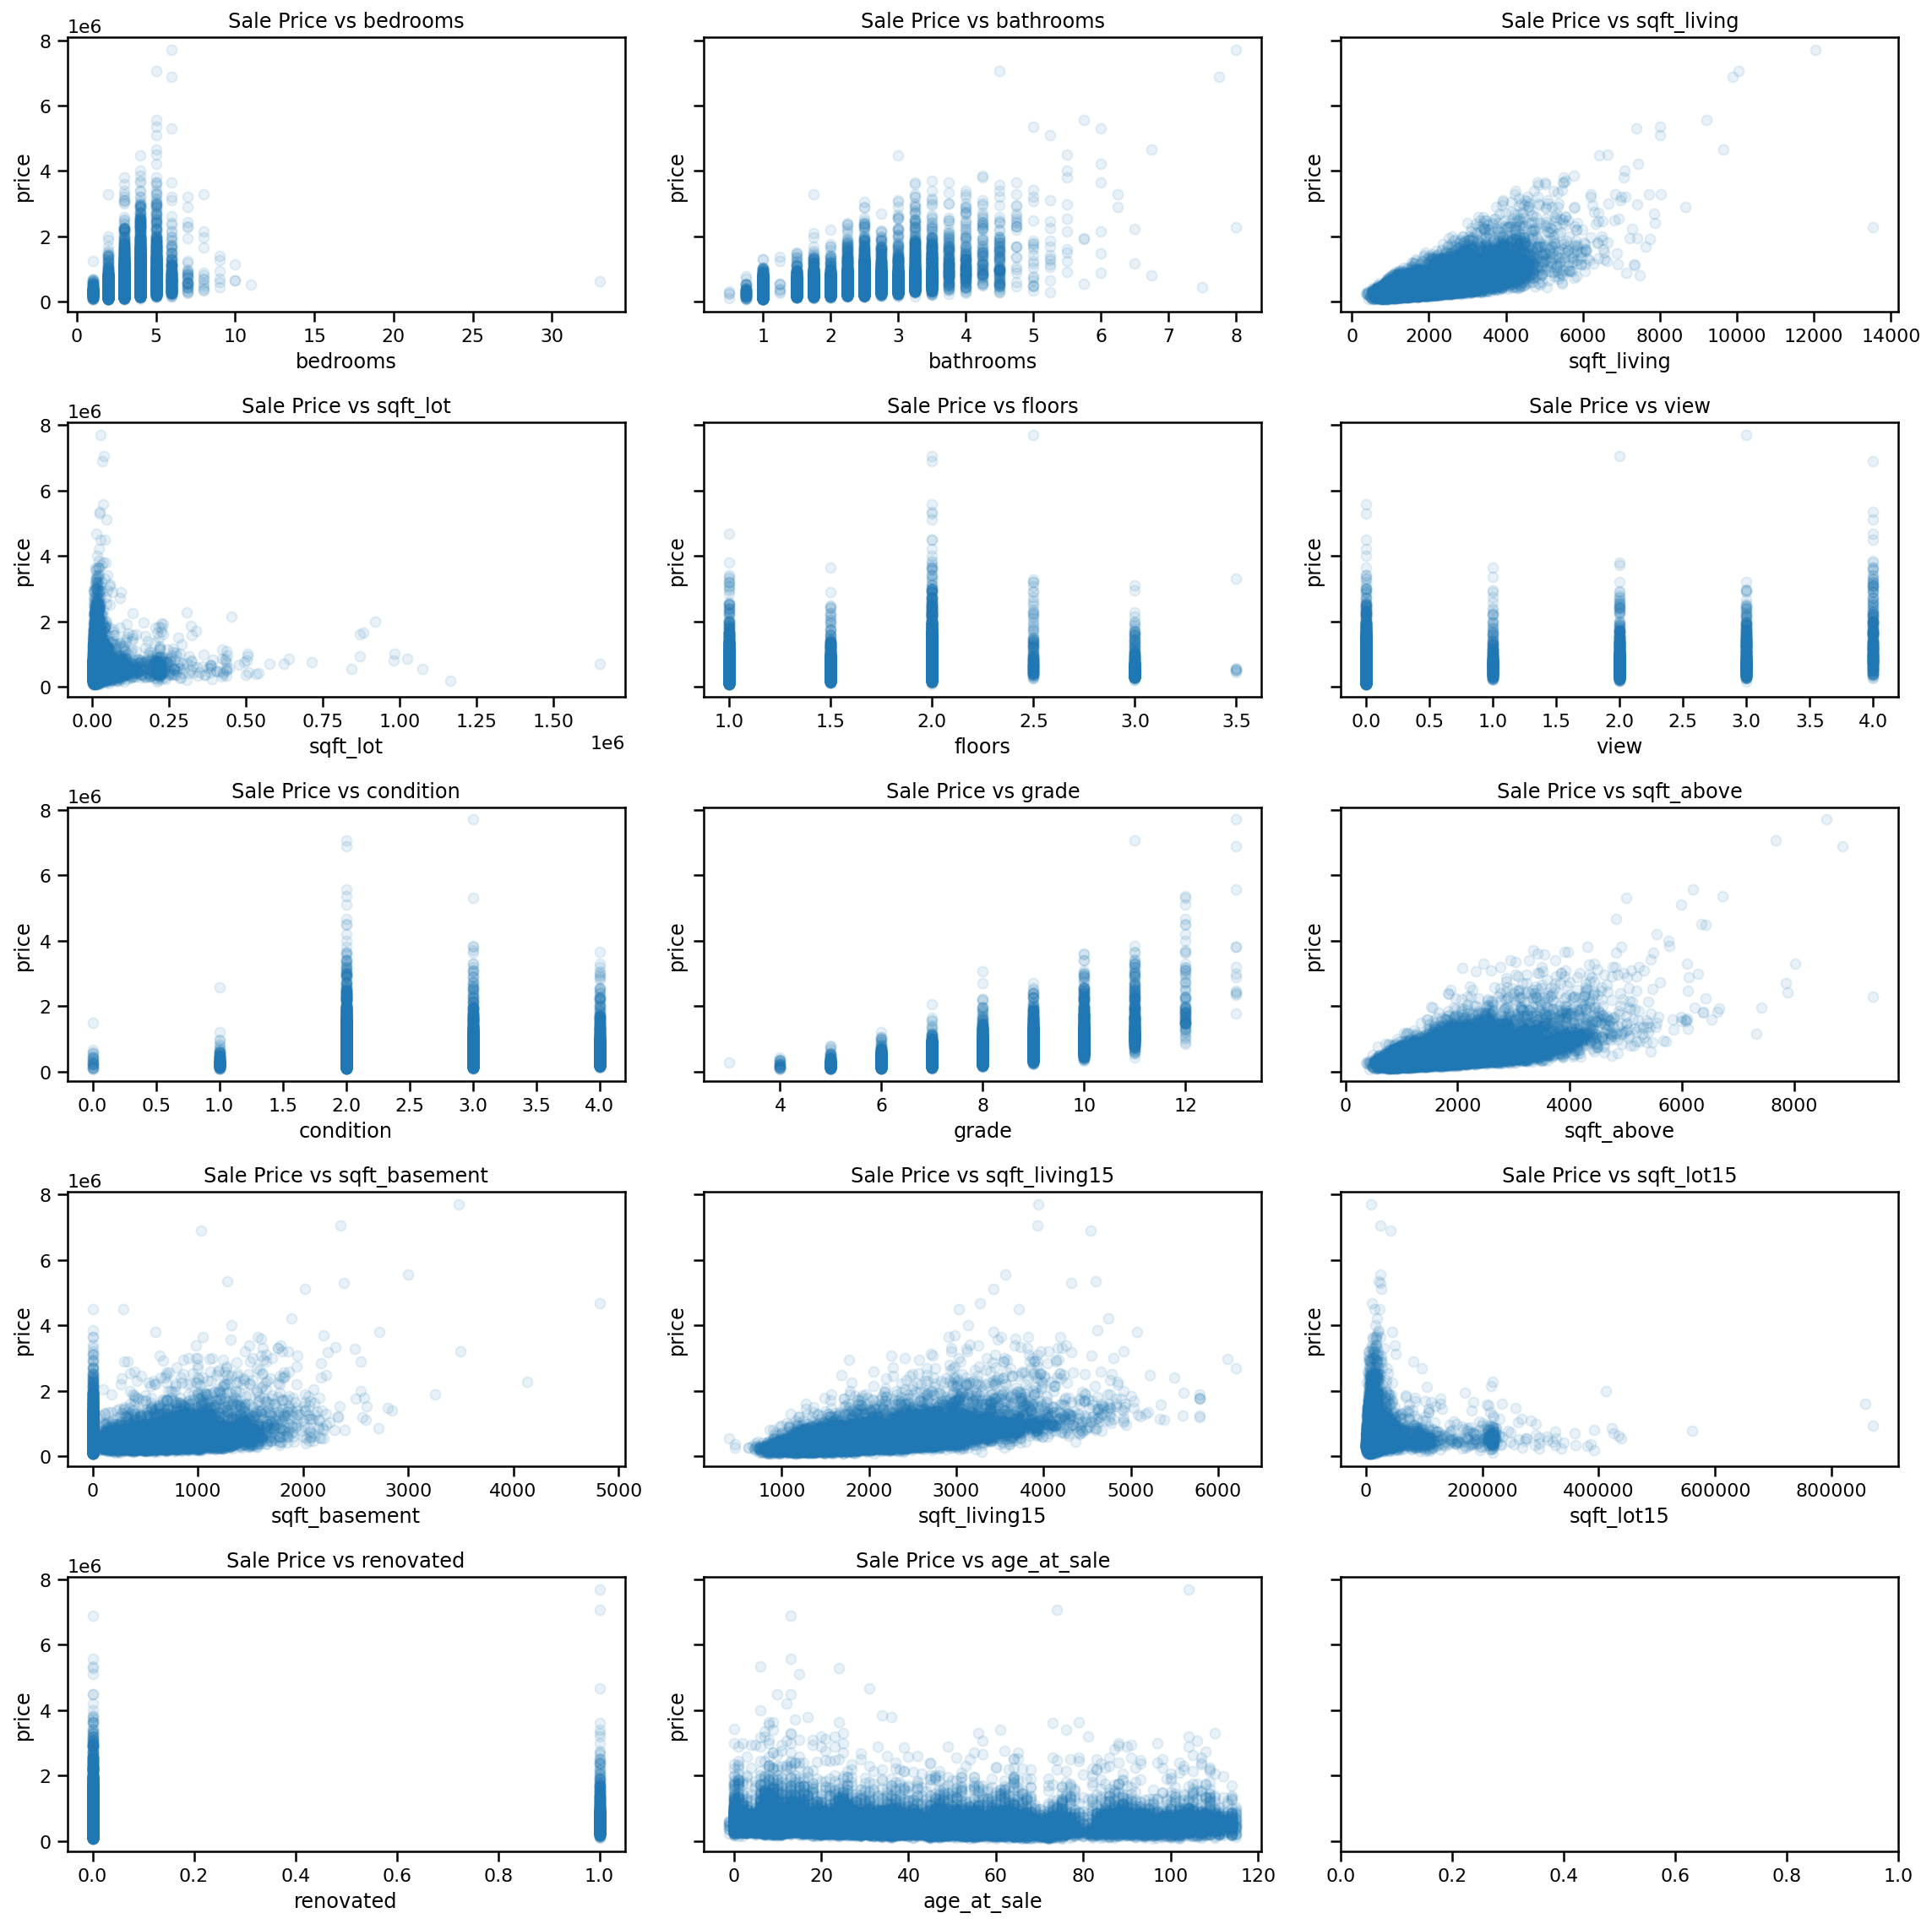

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,16), sharey=True)

dat = data.drop(['price'] , axis =1)

for col,ax in zip(dat.columns,axes.flatten()):
    ax.scatter(dat[col], data['price'], label=col, alpha=.1)
    ax.set_title(f'Sale Price vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('price')

fig.tight_layout()

This graph shows those features below has linear relationship with `price` :
- `bathrooms`
- `sqft_living`
- `grade`
- `sqft_above`
- `sqft_living15`

The columns `floors`, `waterfront`, `view`, `condition`, `grade` and `renovated` can be treated as categorical variables.


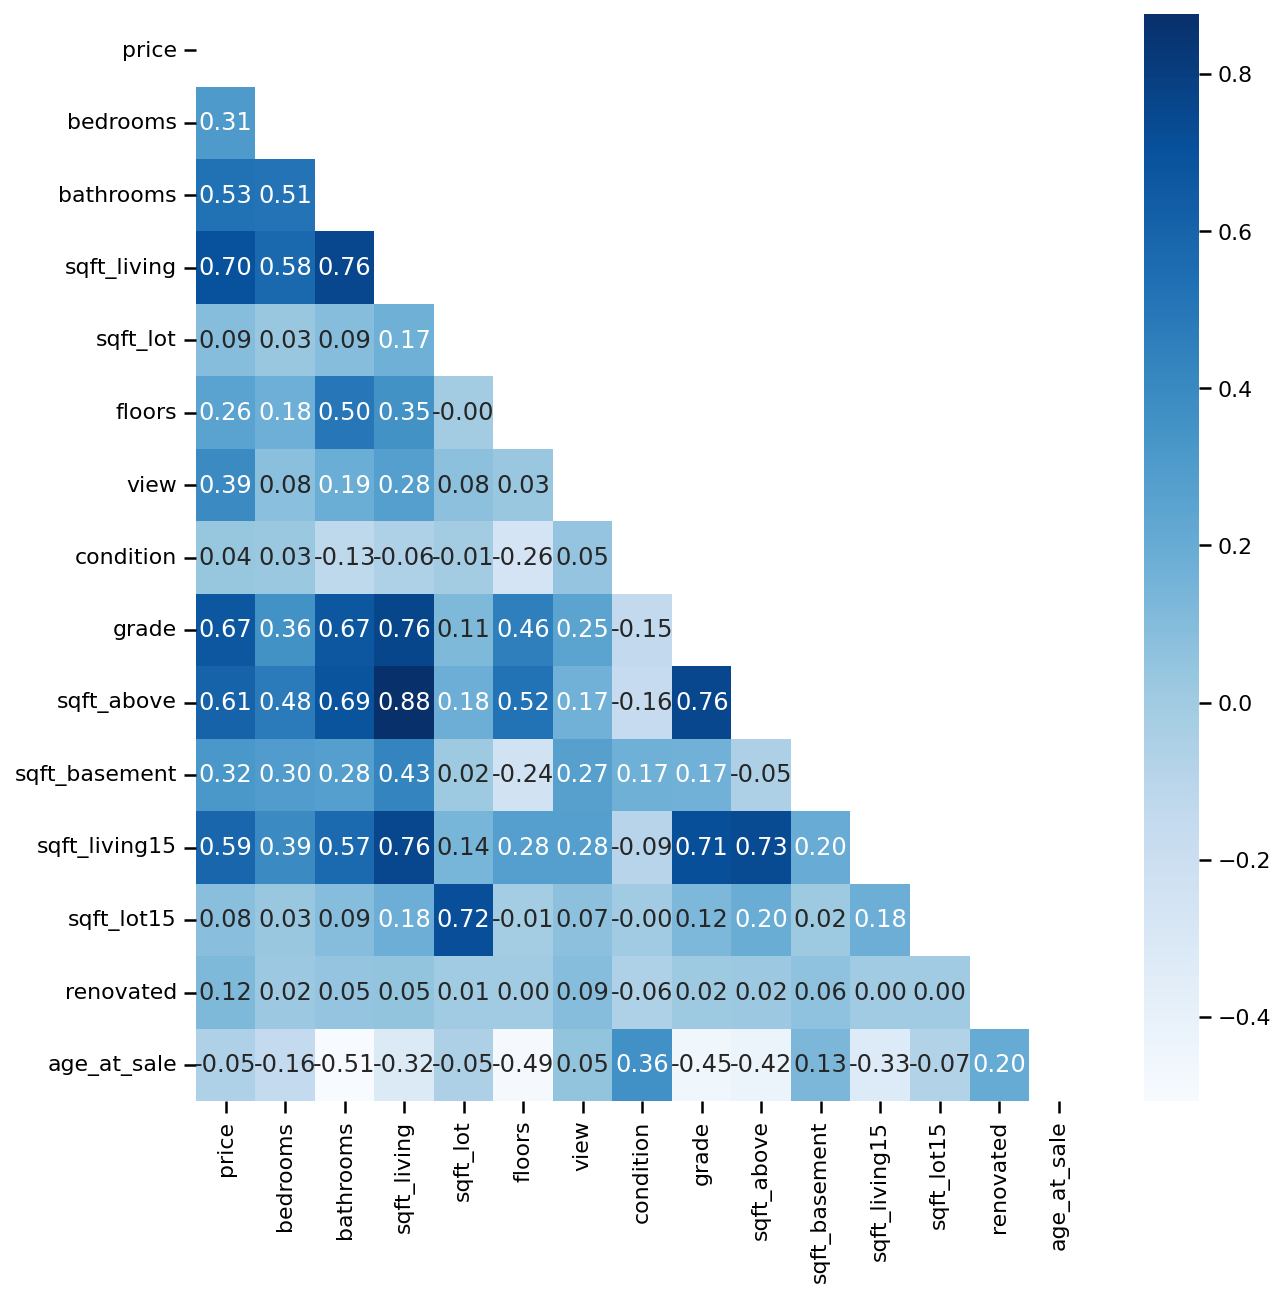

In [16]:
#Initial heatmap highlighing obvious correlations with Price
plt.figure(figsize = (10,10))
mask = np.triu(data.corr())
sns.heatmap(data.corr(), cmap = "Blues",annot = True, fmt = '.2f',mask = mask);

- From heatmap and matrix plot, it seems to be there is a high correlation between `sqft_living`, `sqft_above`,`grade` and `price`

Let's start condacting a model start with those first observation

# Modeling

### First Model (Simple Linear Regression)

- As we checked before `sqft_living`had highest correlation with our target, i ll go ahead and start conducting my first model with highest correlated feature

In [17]:
X_first = data[['sqft_living']]
y_first = data['price']

#simple model comparing sqft_living with price
X_first_sm= sm.add_constant(X_first)
#fitting the linear regression model 
first_model_sm = sm.OLS(y_first, X_first_sm).fit()
#Getting the summary for our model
first_model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:24:27   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-squared value is 0.493 i.e. 49% of the variance in the target variable can be explained by the features. In general this seems like a fairly not strong model enough. An explanatory variable in the model is statistically significant at the 95% level (i.e. p-value < 5%) which means we can reject the null hypothesis.

In [18]:
X_first_train,X_first_test,y_first_train,y_first_test = train_test_split(X_first,y_first,random_state= 10)

first_model = LinearRegression()
first_model.fit(X_first_train, y_first_train)

print('first model R-squared on training:',round(first_model.score(X_first_train, y_first_train),3))
print('first model R-squared on testing:',round(first_model.score(X_first_test, y_first_test),3))

predictions1 = first_model.predict(X_first_test)
RMSE1 = mean_squared_error(y_first_test, predictions1, squared=False) # False returns RMSE value
print('first model RMSE: $', round(RMSE1, 2))

first model R-squared on training: 0.491
first model R-squared on testing: 0.498
first model RMSE: $ 254336.12


- From Simple Linear Regression model above, using `sqft_living` as a predictor, we have an R-squared on test set score of `0.498`. The R-squared score shows that we can only explain for 50% of the variation in the data. This is not a good enough estimation so we will have to try a more complex model to help us get closer predictions.

eval_env: 1


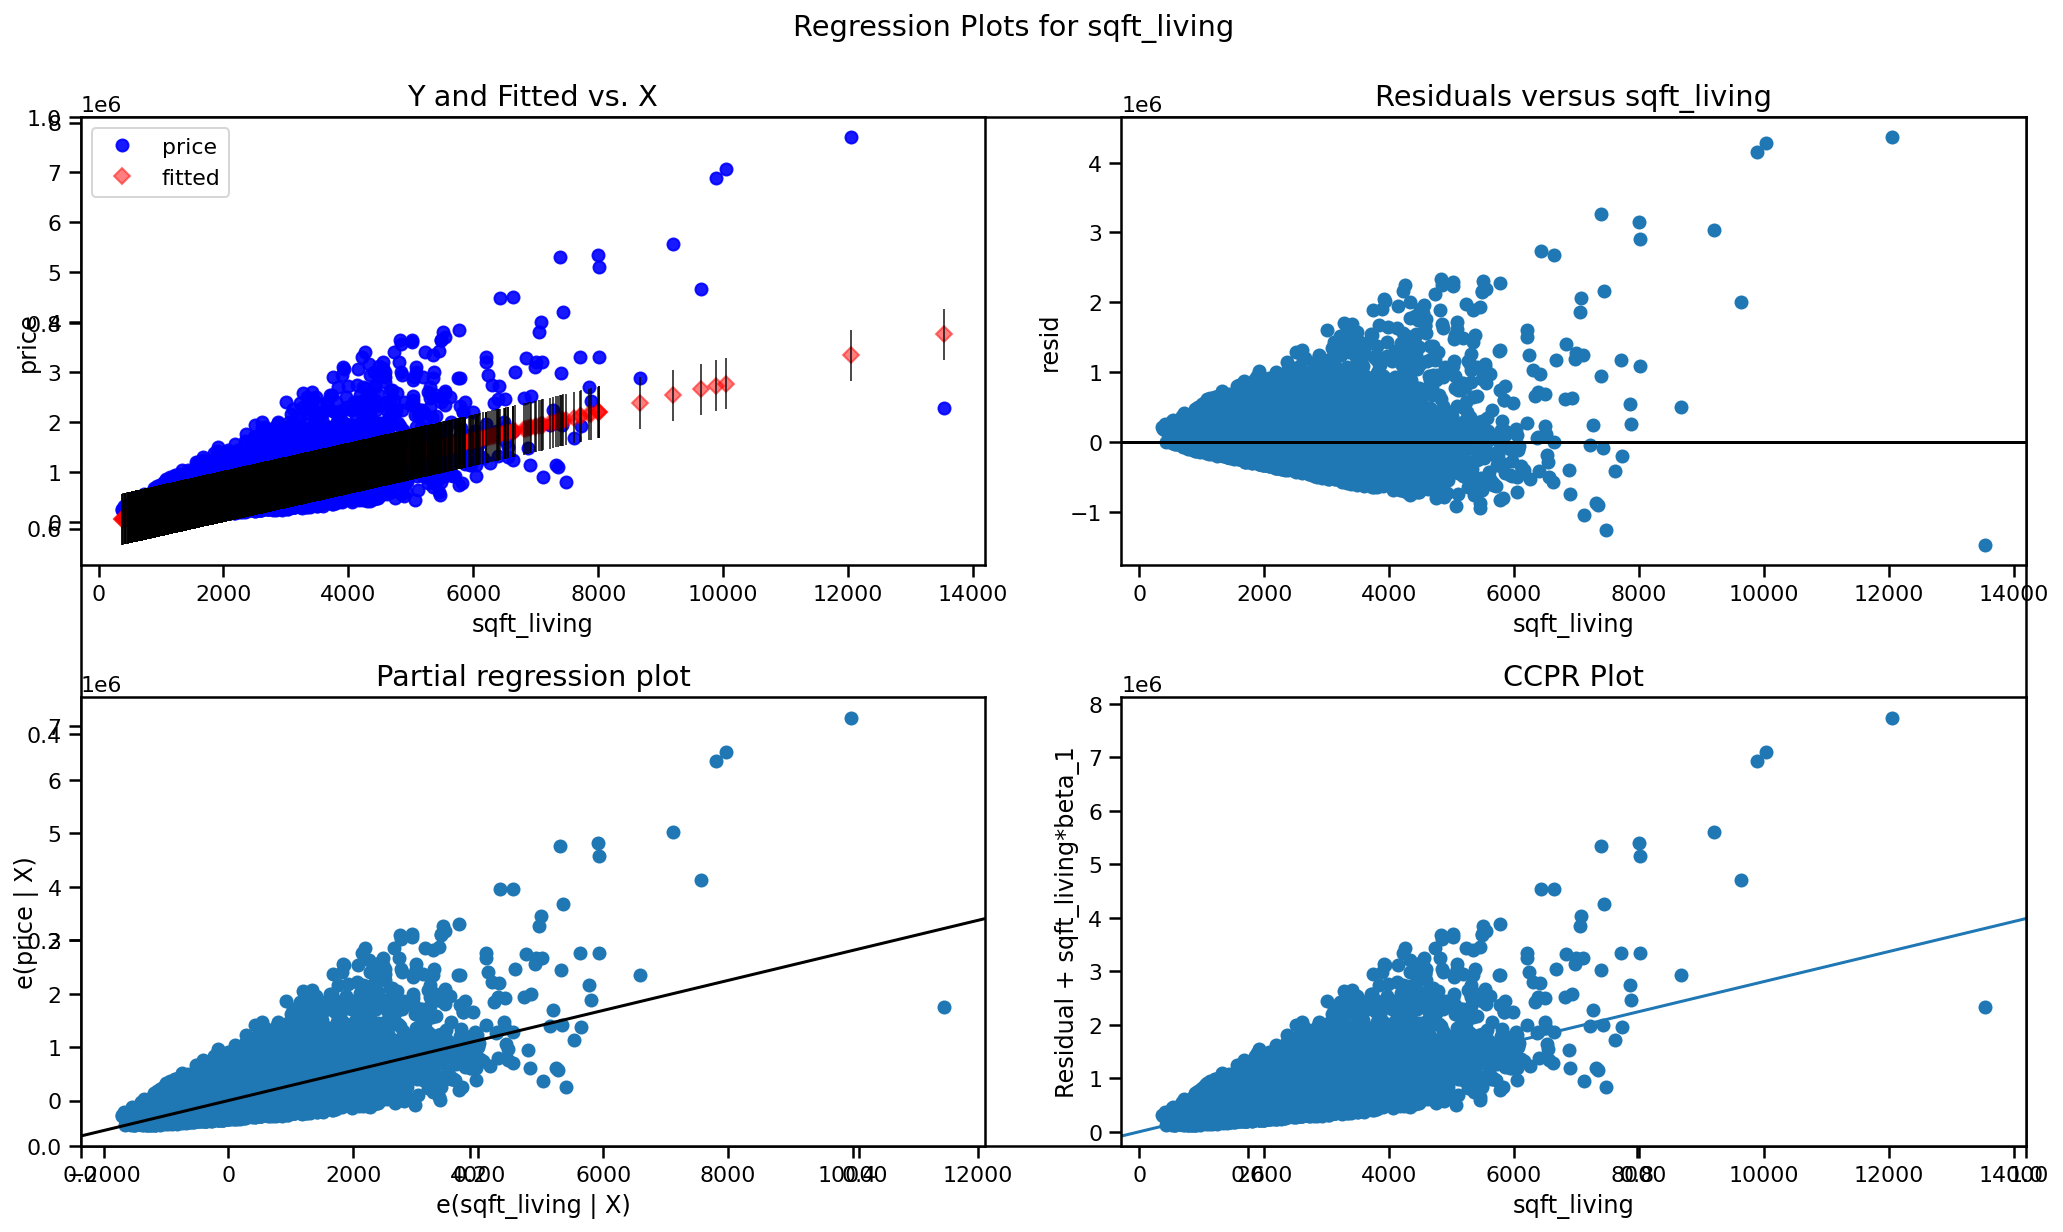

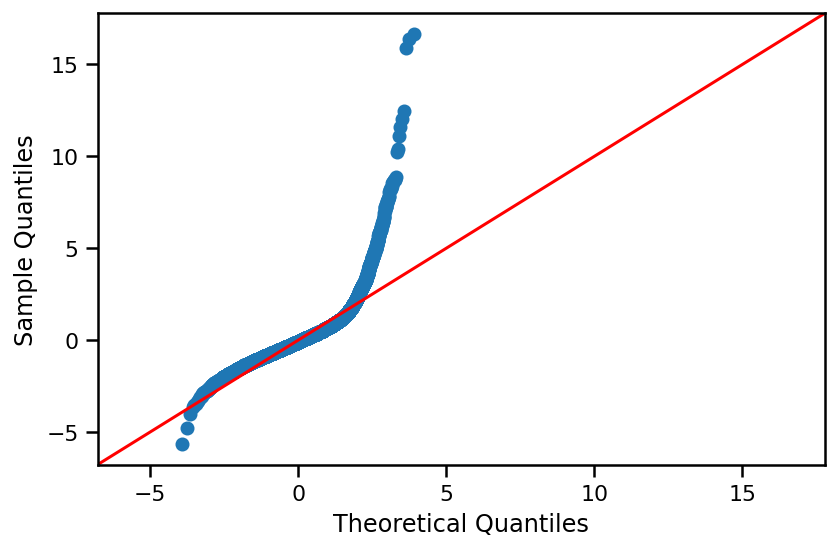

In [19]:
fig ,ax = plt.subplots(figsize = (15,9));
fig = sm.graphics.plot_regress_exog(first_model_sm,'sqft_living', fig=fig);    
fig = sm.qqplot(first_model_sm.resid, dist=stats.norm, line='45', fit=True);
fig.tight_layout()

- A slight curved Q-Q plot line suggests residuals may have a non-normal distribution because it begin to deviate as the values stray further form the mean.First model violates the homoscedasticity (upper right plot shows that)and normality assumptions for linear regression. We can further apply Log-transformation to meet this assumptions in our upcoming models

### Second Model (Multiple Linear Regression)

In [20]:
X_second = data.drop('price', axis =1)
y_second = data['price']

#Second Model with all features
X_second_sm= sm.add_constant(X_second)
second_model_sm = sm.OLS(y_second, X_second_sm).fit()
second_model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2726.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:24:30   Log-Likelihood:            -2.9640e+05
No. Observations:               21597   AIC:                         5.928e+05
Df Residuals:                   21582   BIC:                         5.929e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.727e+05   1.68e+04    -57.775      0.000   -1.01e+06    -9.4e+05
bedrooms      -4.215e+04   2079.000    -20.273      0.000   -4.62e+04   -3.81e+04
bathrooms      4.579e+04   3578.962     12.794      0.000    3.88e+04    5.28e+04
sqft_living     108.6067     19.829      5.477      0.000      69.741     147.473
sqft_lot         -0.0316      0.052     -0.602      0.547      -0.134       0.071
floors         2.729e+04   3873.336      7.045      0.000    1.97e+04    3.49e+04
view           6.902e+04   2151.125     32.085      0.000    6.48e+04    7.32e+04
condition      2.096e+04   2546.010      8.232      0.000     1.6e+04     2.6e+04
grade          1.195e+05   2307.257     51.776      0.000    1.15e+05    1.24e+05
sqft_above       57.6153     19.798      2.910      0.004      18.810      96.420
sqft_basement    60.3652     19.650      3.072      0.002      21.850      98.881
sqft_living15    20.6684      3.681      5.615      0.000      13.454      27.883
sqft_lot15       -0.5303      0.080     -6.615      0.000      -0.687      -0.373
renovated      3.872e+04   8684.702      4.459      0.000    2.17e+04    5.57e+04
age_at_sale    3570.8733     71.860     49.692      0.000    3430.022    3711.725
==============================================================================
Omnibus:                    17273.621   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1351836.123
Skew:                           3.303   Prob(JB):                         0.00
Kurtosis:                      41.192   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- If we consider all features for the model . R-squared seems to be higher than simple model. So we can say that we captured better model and still not enough for the best fit model

In [21]:
X_second_train,X_second_test,y_second_train,y_second_test = train_test_split(X_second,y_second,random_state= 10)

second_model = LinearRegression()
second_model.fit(X_second_train, y_second_train)

print("second model R-squared on testing:", round(second_model.score(X_second_test, y_second_test),3))
print("second model R-squared on training:", round(second_model.score(X_second_train, y_second_train),3))

predictions2 = second_model.predict(X_second_test)
RMSE2 = mean_squared_error(y_second_test, predictions2, squared=False) # False returns RMSE value
print('second model RMSE2: $', round(RMSE2, 2))

second model R-squared on testing: 0.646
second model R-squared on training: 0.636
second model RMSE2: $ 213794.57


#### 3.Dropping the features not statistically significant


- We saw that `sqft_lot` has proven not to be statistically significant (p > 0.05). So we can say that this feature not statistically significant for our model. So that, i will drop this feature for next model.

In [22]:
X_third = data.drop(['price','sqft_lot'], axis = 1)              
y_third = data['price']                                          

#Third Model with dropped sqft_lot
X_third_sm= sm.add_constant(X_third)
third_model_sm = sm.OLS(y_third, X_third_sm).fit()
third_model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2935.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:24:30   Log-Likelihood:            -2.9640e+05
No. Observations:               21597   AIC:                         5.928e+05
Df Residuals:                   21583   BIC:                         5.929e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.728e+05   1.68e+04    -57.788      0.000   -1.01e+06    -9.4e+05
bedrooms      -4.212e+04   2078.392    -20.264      0.000   -4.62e+04    -3.8e+04
bathrooms      4.577e+04   3578.826     12.790      0.000    3.88e+04    5.28e+04
sqft_living     108.6598     19.828      5.480      0.000      69.795     147.525
floors         2.738e+04   3870.642      7.073      0.000    1.98e+04     3.5e+04
view           6.899e+04   2150.401     32.080      0.000    6.48e+04    7.32e+04
condition      2.098e+04   2545.795      8.240      0.000     1.6e+04     2.6e+04
grade          1.195e+05   2307.214     51.776      0.000    1.15e+05    1.24e+05
sqft_above       57.3857     19.794      2.899      0.004      18.589      96.183
sqft_basement    60.2790     19.649      3.068      0.002      21.765      98.793
sqft_living15    20.7831      3.676      5.654      0.000      13.578      27.988
sqft_lot15       -0.5641      0.057     -9.864      0.000      -0.676      -0.452
renovated      3.876e+04   8684.320      4.463      0.000    2.17e+04    5.58e+04
age_at_sale    3570.3357     71.854     49.689      0.000    3429.497    3711.174
==============================================================================
Omnibus:                    17278.927   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1353687.224
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      41.218   Cond. No.                     3.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X_third_train,X_third_test,y_third_train,y_third_test = train_test_split(X_third,y_third,random_state= 10)


third_model = LinearRegression()
third_model.fit(X_third_train, y_third_train)

print("third model R-squared on testing:", round(third_model.score(X_third_test, y_third_test),3))
print("third model R-squared on training:", round(third_model.score(X_third_train, y_third_train),3))

predictions3 = third_model.predict(X_third_test)
RMSE3 = mean_squared_error(y_third_test, predictions3, squared=False) # False returns RMSE value
print('third model RMSE3: $', round(RMSE3, 2))

third model R-squared on testing: 0.646
third model R-squared on training: 0.636
third model RMSE3: $ 213781.33


- Dropping `sqft_lot` has not change our R squared values. I will keep remaking another model

#### 4.Normalizing Data

In [24]:
data_norm = data.copy()

# normalize numerical columns that don't contain ordinal or categorical numbers
feat_norm = ['sqft_living', 'sqft_lot','sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15']


def norm(features):
    return (features - features.mean())/ features.std()
for feat in feat_norm: 
    data_norm[feat] = norm(data_norm[feat])
    

In [25]:
data_norm.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  221900.0         3       1.00    -0.980629 -0.228177     1.0     0   
1  538000.0         3       2.25     0.533357 -0.189735     2.0     0   
2  180000.0         2       1.00    -1.427201 -0.123137     1.0     0   
3  604000.0         4       3.00    -0.131054 -0.243873     1.0     0   
4  510000.0         3       2.00    -0.436030 -0.169499     1.0     0   

   condition  grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15  \
0          2      7   -0.735234      -0.649622      -0.943654   -0.260621   
1          2      7    0.460766       0.259841      -0.432877   -0.187695   
2          2      6   -1.230546      -0.649622       1.070267   -0.172186   
3          4      7   -0.892284       1.419407      -0.914467   -0.284453   
4          2      8   -0.131194      -0.649622      -0.272347   -0.192682   

   renovated  age_at_sale  
0          0           59  
1          1           63  
2          0           82  
3          0           49  
4          0           28

In [26]:
X_forth = data_norm.drop(['price','sqft_lot'], axis = 1)
y_forth  = data_norm['price']
# Forth Model with features scaled
X_forth_sm= sm.add_constant(X_forth)
forth_model_sm = sm.OLS(y_forth , X_forth_sm).fit()
forth_model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2935.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:24:31   Log-Likelihood:            -2.9640e+05
No. Observations:               21597   AIC:                         5.928e+05
Df Residuals:                   21583   BIC:                         5.929e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.928e+05   2.16e+04    -27.472      0.000   -6.35e+05   -5.51e+05
bedrooms      -4.212e+04   2078.392    -20.264      0.000   -4.62e+04    -3.8e+04
bathrooms      4.577e+04   3578.826     12.790      0.000    3.88e+04    5.28e+04
sqft_living    9.976e+04   1.82e+04      5.480      0.000    6.41e+04    1.35e+05
floors         2.738e+04   3870.642      7.073      0.000    1.98e+04     3.5e+04
view           6.899e+04   2150.401     32.080      0.000    6.48e+04    7.32e+04
condition      2.098e+04   2545.795      8.240      0.000     1.6e+04     2.6e+04
grade          1.195e+05   2307.214     51.776      0.000    1.15e+05    1.24e+05
sqft_above      4.75e+04   1.64e+04      2.899      0.004    1.54e+04    7.96e+04
sqft_basement  2.651e+04   8642.126      3.068      0.002    9572.678    4.35e+04
sqft_living15  1.424e+04   2518.766      5.654      0.000    9304.250    1.92e+04
sqft_lot15    -1.539e+04   1559.714     -9.864      0.000   -1.84e+04   -1.23e+04
renovated      3.876e+04   8684.320      4.463      0.000    2.17e+04    5.58e+04
age_at_sale    3570.3357     71.854     49.689      0.000    3429.497    3711.174
==============================================================================
Omnibus:                    17278.927   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1353687.224
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      41.218   Cond. No.                         910.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X_forth_train,X_forth_test,y_forth_train,y_forth_test = train_test_split(X_forth,y_forth,random_state= 10)


forth_model = LinearRegression()
forth_model.fit(X_forth_train, y_forth_train)

print("forth model R-squared on testing:", round(forth_model.score(X_forth_test, y_forth_test),3))
print("forth model R-squared on training:", round(forth_model.score(X_forth_train, y_forth_train),3))

predictions4 = forth_model.predict(X_forth_test)
RMSE4 = mean_squared_error(y_forth_test, predictions4, squared=False) # False returns RMSE value
print('forth model RMSE4: $', round(RMSE4, 2))

forth model R-squared on testing: 0.646
forth model R-squared on training: 0.636
forth model RMSE4: $ 213781.33


#### 5.Multicollinearity Issues

In [28]:
# multicollinearity between features
corr = X_forth.corr().abs().unstack()
# s = corr.unstack()
sort_corr_pair = corr.sort_values(kind="quicksort" , ascending = False)
corr_pair = pd.DataFrame(sort_corr_pair)
corr_pair.columns = ['corrr']
pair = corr_pair.loc[(corr_pair['corrr'] < 1)&(corr_pair['corrr'] > 0.70)]
pair = pair.drop_duplicates()
pair.head()


corrr
sqft_above    sqft_living  0.876448
grade         sqft_living  0.762779
sqft_living15 sqft_living  0.756402
grade         sqft_above   0.756073
bathrooms     sqft_living  0.755758

In [29]:
pair.iloc[1:2]

corrr
grade sqft_living  0.762779

 It seems to be there are potential multicollinearity issues with:
- `sqft_living` and `sqft_above`,
- `sqft_living` and `grade`, 
- `sqft_living` and `sqft_living15`

  This is due to high correlation values
  
I decided to remove `sqft_above` to avoid any potential modeling issues

In [30]:
X_fifth = X_forth.drop(['sqft_above'], axis =1)
y_fifth= data_norm['price']

X_fifth_sm = sm.add_constant(X_fifth)
fifth_model_sm = sm.OLS(y_fifth,X_fifth_sm).fit()
fifth_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3178.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:24:31   Log-Likelihood:            -2.9640e+05
No. Observations:               21597   AIC:                         5.928e+05
Df Residuals:                   21584   BIC:                         5.929e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.934e+05   2.16e+04    -27.494      0.000   -6.36e+05   -5.51e+05
bedrooms      -4.215e+04   2078.711    -20.279      0.000   -4.62e+04   -3.81e+04
bathrooms       4.53e+04   3575.769     12.669      0.000    3.83e+04    5.23e+04
sqft_living    1.515e+05   3641.459     41.597      0.000    1.44e+05    1.59e+05
floors         2.849e+04   3852.262      7.395      0.000    2.09e+04     3.6e+04
view           6.875e+04   2149.263     31.989      0.000    6.45e+04     7.3e+04
condition      2.077e+04   2545.196      8.160      0.000    1.58e+04    2.58e+04
grade          1.196e+05   2307.323     51.819      0.000    1.15e+05    1.24e+05
sqft_basement  2153.0208   2023.615      1.064      0.287   -1813.415    6119.456
sqft_living15  1.468e+04   2514.661      5.837      0.000    9750.409    1.96e+04
sqft_lot15    -1.532e+04   1559.811     -9.821      0.000   -1.84e+04   -1.23e+04
renovated      3.863e+04   8685.684      4.447      0.000    2.16e+04    5.57e+04
age_at_sale    3565.2786     71.845     49.625      0.000    3424.458    3706.100
==============================================================================
Omnibus:                    17311.338   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1363853.330
Skew:                           3.313   Prob(JB):                         0.00
Kurtosis:                      41.363   Cond. No.                         767.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X_fifth_train,X_fifth_test,y_fifth_train,y_fifth_test = train_test_split(X_fifth,y_fifth,random_state= 10)

fifth_model = LinearRegression()
fifth_model.fit(X_fifth_train, y_fifth_train)

print("fifth model R-squared on testing:", round(fifth_model.score(X_fifth_test, y_fifth_test),3))
print("fifth model R-squared on training:", round(fifth_model.score(X_fifth_train, y_fifth_train),3))

predictions5 = fifth_model.predict(X_fifth_test)
RMSE5 = mean_squared_error(y_fifth_test, predictions5, squared=False) # False returns RMSE value
print('fifth model RMSE5: $', round(RMSE5, 2))

fifth model R-squared on testing: 0.645
fifth model R-squared on training: 0.636
fifth model RMSE5: $ 213860.35


### Removing Outliers

- In order to get our linear regression model to perform better I decided to use three standard deviations from the mean to remove any outliers in `bedrooms`, `sqft_living` and `sqft_lot15`.

In [32]:
X_fifth.describe().T

count          mean        std       min        25%  \
bedrooms       21597.0  3.373200e+00   0.926299  1.000000   3.000000   
bathrooms      21597.0  2.115826e+00   0.768984  0.500000   1.750000   
sqft_living    21597.0 -1.857928e-16   1.000000 -1.862880  -0.708330   
floors         21597.0  1.494096e+00   0.539683  1.000000   1.000000   
view           21597.0  2.331805e-01   0.764673  0.000000   0.000000   
condition      21597.0  2.409825e+00   0.650546  0.000000   2.000000   
grade          21597.0  7.657915e+00   1.173200  3.000000   7.000000   
sqft_basement  21597.0 -2.477457e-15   1.000000 -0.649622  -0.649622   
sqft_living15  21597.0 -1.936580e-16   1.000000 -2.316914  -0.724749   
sqft_lot15     21597.0 -1.840605e-16   1.000000 -0.443906  -0.280786   
renovated      21597.0  3.444923e-02   0.182384  0.000000   0.000000   
age_at_sale    21597.0  4.332329e+01  29.377285 -1.000000  18.000000   

                     50%        75%         max  
bedrooms        3.000000   4.000000   33.000000  
bathrooms       2.250000   2.500000    8.000000  
sqft_living    -0.185514   0.511573   12.481867  
floors          1.500000   2.000000    3.500000  
view            0.000000   0.000000    4.000000  
condition       2.000000   3.000000    4.000000  
grade           7.000000   8.000000   13.000000  
sqft_basement  -0.649622   0.600890   10.309411  
sqft_living15  -0.213972   0.544896    6.163444  
sqft_lot15     -0.188392  -0.098088   31.474217  
renovated       0.000000   0.000000    1.000000  
age_at_sale    40.000000  63.000000  115.000000

- I dropped sqft_basement because it s not statistically significant after last model

In [33]:
data_out = data_norm.drop(['sqft_lot','sqft_above','sqft_basement'],axis=1)
data_out.head()

price  bedrooms  bathrooms  sqft_living  floors  view  condition  grade  \
0  221900.0         3       1.00    -0.980629     1.0     0          2      7   
1  538000.0         3       2.25     0.533357     2.0     0          2      7   
2  180000.0         2       1.00    -1.427201     1.0     0          2      6   
3  604000.0         4       3.00    -0.131054     1.0     0          4      7   
4  510000.0         3       2.00    -0.436030     1.0     0          2      8   

   sqft_living15  sqft_lot15  renovated  age_at_sale  
0      -0.943654   -0.260621          0           59  
1      -0.432877   -0.187695          1           63  
2       1.070267   -0.172186          0           82  
3      -0.914467   -0.284453          0           49  
4      -0.272347   -0.192682          0           28

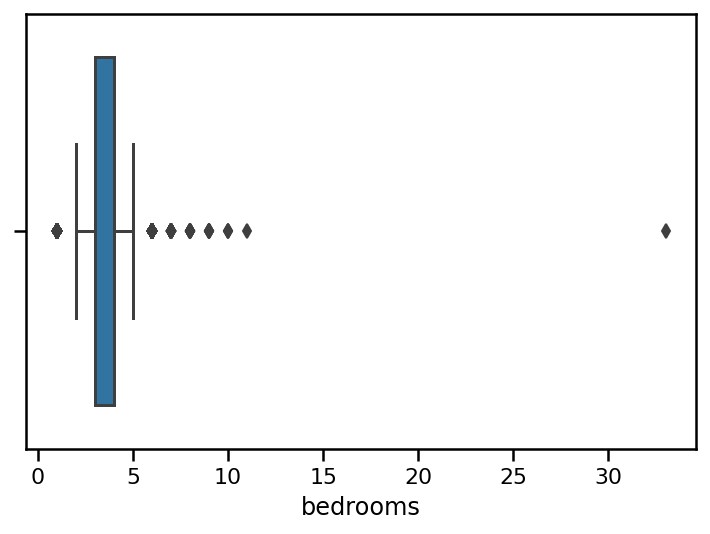

In [34]:
sns.boxplot(data_out['bedrooms']);

In [35]:
upper = data_out.bedrooms.mean() + 3*data_out.bedrooms.std()
lower = data_out.bedrooms.mean() -3*data_out.bedrooms.std()
print('BEFORE REMOVING OUTLIERS:')
print(data_out.describe().bedrooms)
print('')
data_out = data_out[(data_out.bedrooms<upper) & (data_out.bedrooms>lower)]
print('AFTER REMOVING OUTLIERS:')
print(data_out.describe().bedrooms)

BEFORE REMOVING OUTLIERS:
count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

AFTER REMOVING OUTLIERS:
count    21535.000000
mean         3.359786
std          0.875090
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: bedrooms, dtype: float64


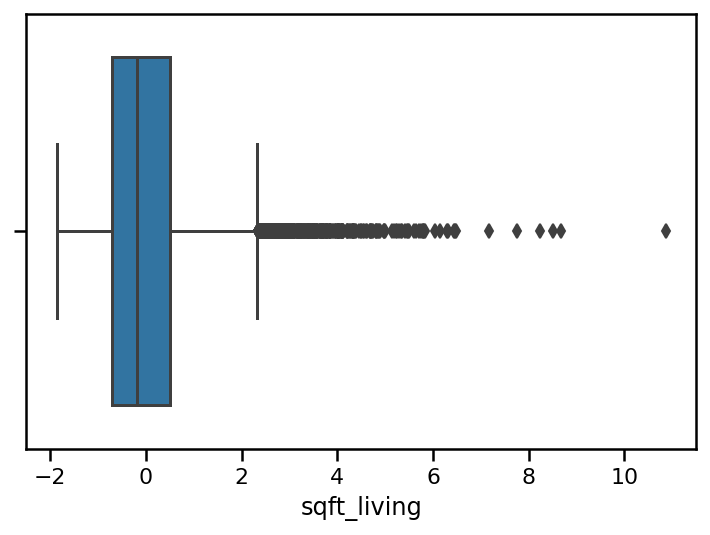

In [36]:
sns.boxplot(data_out['sqft_living']);

In [37]:
upper = data_out.sqft_living.mean() + 3*data_out.sqft_living.std()
lower = data_out.sqft_living.mean() -3*data_out.sqft_living.std()
print('BEFORE REMOVING OUTLIERS:')
print(data_out.describe().sqft_living)
print('')
data_out = data_out[(data_out.sqft_living<upper) & (data_out.sqft_living>lower)]
print('AFTER REMOVING OUTLIERS:')
print(data_out.describe().sqft_living)

BEFORE REMOVING OUTLIERS:
count    21535.000000
mean        -0.005555
std          0.990837
min         -1.862880
25%         -0.719222
50%         -0.185514
75%          0.500681
max         10.858961
Name: sqft_living, dtype: float64

AFTER REMOVING OUTLIERS:
count    21290.000000
mean        -0.051706
std          0.889976
min         -1.862880
25%         -0.719222
50%         -0.196406
75%          0.468005
max          2.962270
Name: sqft_living, dtype: float64


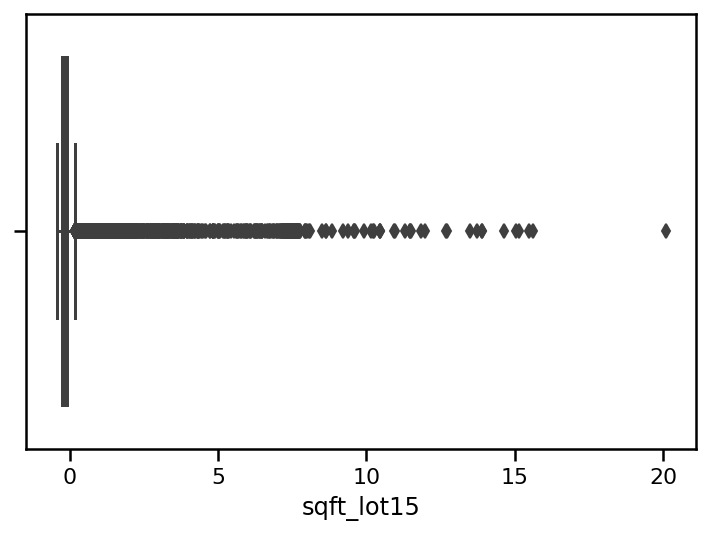

In [38]:
sns.boxplot(data_out['sqft_lot15']);

In [39]:
upper =data_out.sqft_lot15.mean() + 3*data_out.sqft_lot15.std()
lower =data_out.sqft_lot15.mean() -3*data_out.sqft_lot15.std()
print('BEFORE REMOVING OUTLIERS:')
print(data_out.describe().sqft_lot15)
print('')
data_out = data_out[(data_out.sqft_lot15<upper) & (data_out.sqft_lot15>lower)]
print('AFTER REMOVING OUTLIERS:')
print(data_out.describe().sqft_lot15)

BEFORE REMOVING OUTLIERS:
count    21290.000000
mean        -0.011649
std          0.936484
min         -0.443906
25%         -0.280786
50%         -0.189418
75%         -0.101131
max         20.086890
Name: sqft_lot15, dtype: float64

AFTER REMOVING OUTLIERS:
count    20928.000000
mean        -0.116187
std          0.353215
min         -0.443906
25%         -0.282619
50%         -0.191783
75%         -0.107272
max          2.790294
Name: sqft_lot15, dtype: float64


In [40]:
X_sixth = data_out.drop('price',axis =1)
y_sixth= data_out['price']

X_sixth_sm = sm.add_constant(X_sixth)
sixth_model_sm = sm.OLS(y_sixth,X_sixth_sm).fit()
sixth_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     3145.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:24:32   Log-Likelihood:            -2.8415e+05
No. Observations:               20928   AIC:                         5.683e+05
Df Residuals:                   20916   BIC:                         5.684e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.355e+05   1.94e+04    -32.821      0.000   -6.73e+05   -5.98e+05
bedrooms      -3.151e+04   1991.391    -15.826      0.000   -3.54e+04   -2.76e+04
bathrooms      4.183e+04   3166.241     13.211      0.000    3.56e+04     4.8e+04
sqft_living     1.06e+05   3287.528     32.233      0.000    9.95e+04    1.12e+05
floors         3.162e+04   3130.768     10.100      0.000    2.55e+04    3.78e+04
view            6.58e+04   1923.170     34.212      0.000     6.2e+04    6.96e+04
condition       2.46e+04   2230.579     11.029      0.000    2.02e+04     2.9e+04
grade          1.194e+05   2038.825     58.558      0.000    1.15e+05    1.23e+05
sqft_living15  3.405e+04   2292.804     14.851      0.000    2.96e+04    3.85e+04
sqft_lot15    -4.398e+04   4029.296    -10.915      0.000   -5.19e+04   -3.61e+04
renovated       4.33e+04   7654.225      5.657      0.000    2.83e+04    5.83e+04
age_at_sale    3369.4255     63.157     53.350      0.000    3245.633    3493.218
==============================================================================
Omnibus:                     9728.531   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124219.961
Skew:                           1.903   Prob(JB):                         0.00
Kurtosis:                      14.312   Cond. No.                         789.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_sixth_train,X_sixth_test,y_sixth_train,y_sixth_test = train_test_split(X_sixth,y_sixth,random_state= 10)

sixth_model = LinearRegression()
sixth_model.fit(X_sixth_train, y_sixth_train)

print("sixth model R-squared on testing:", round(sixth_model.score(X_sixth_test, y_sixth_test),4))
print("sixth model R-squared on training:", round(sixth_model.score(X_sixth_train, y_sixth_train),3))

predictions6 = sixth_model.predict(X_sixth_test)
RMSE6 = mean_squared_error(y_sixth_test, predictions6, squared=False) # False returns RMSE value
print('sixth model RMSE6: $',round(RMSE6, 2))

sixth model R-squared on testing: 0.613
sixth model R-squared on training: 0.626
sixth model RMSE6: $ 190414.9


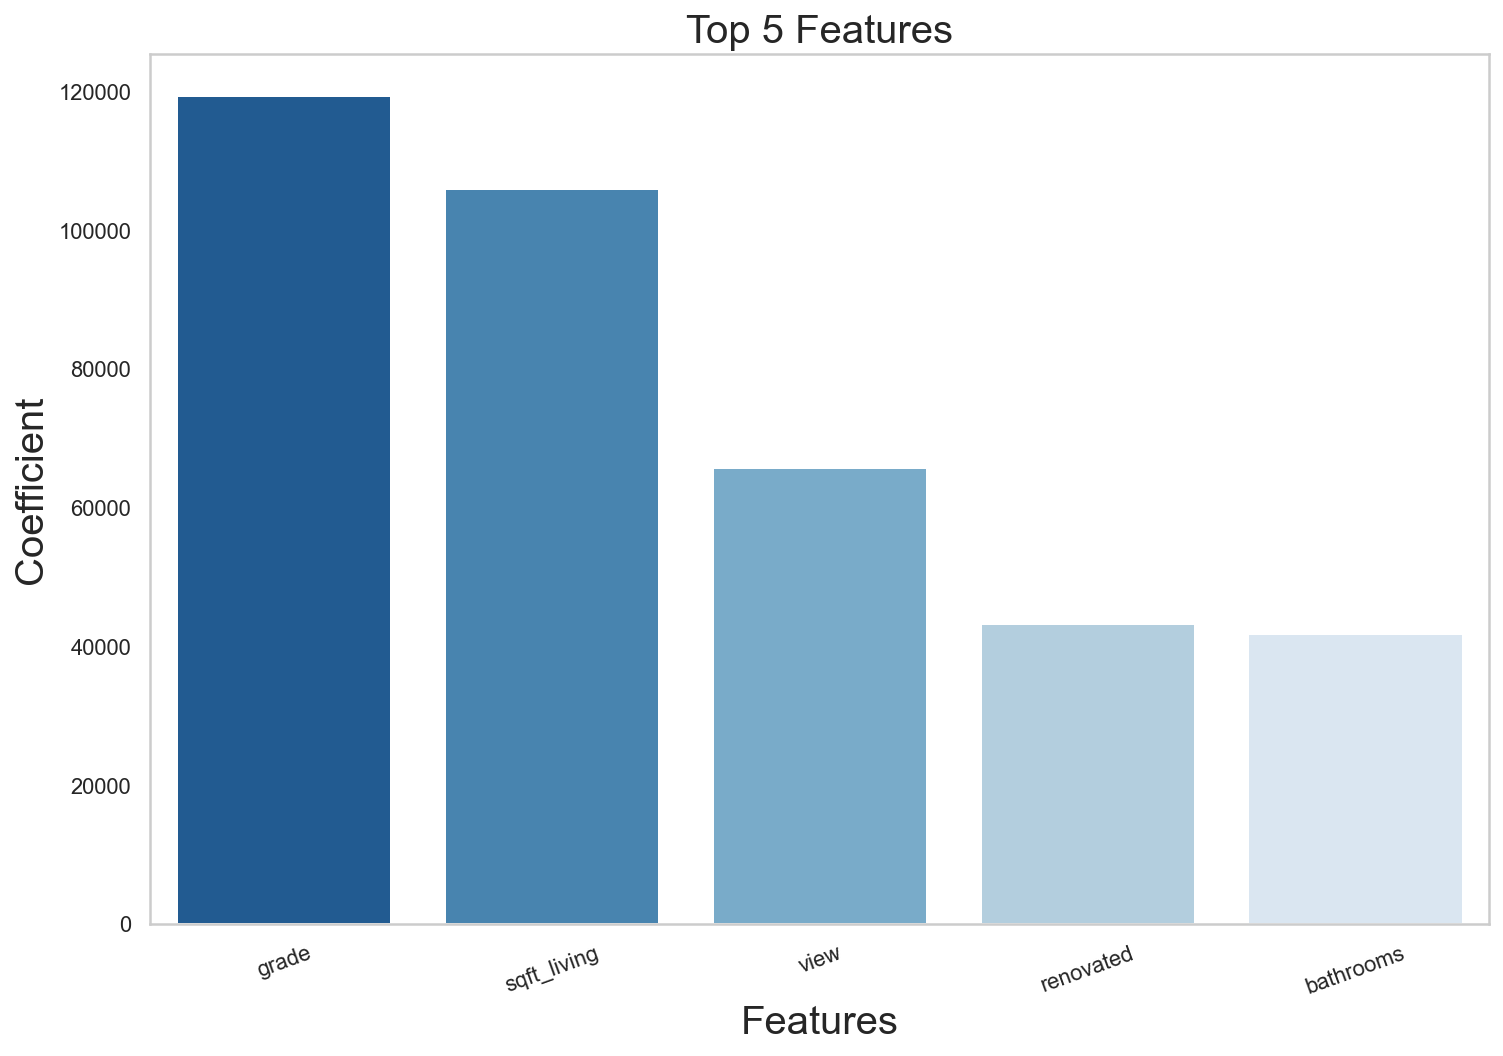

In [42]:
#Plotting the features with the highest coefficients 
sns.set_style("whitegrid", {'axes.grid' : False})
coef_top_5 = sixth_model_sm.params.sort_values(ascending=False).head(5)

model_coef =pd.DataFrame(coef_top_5, columns =['coefficient'])
# model_coef.drop('const', axis=0, inplace= True)
plt.figure(figsize = (12,8))
a= sns.barplot(data=model_coef, x=model_coef.index, y= 'coefficient', palette="Blues_r")
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.title('Top 5 Features', size=20)
plt.xticks(rotation=20);
plt.savefig('Top 5 Features.png', dpi=100, bbox_inches='tight')


- Before assumption checking, i want to apply log transform to target value in order to met linearty criteria

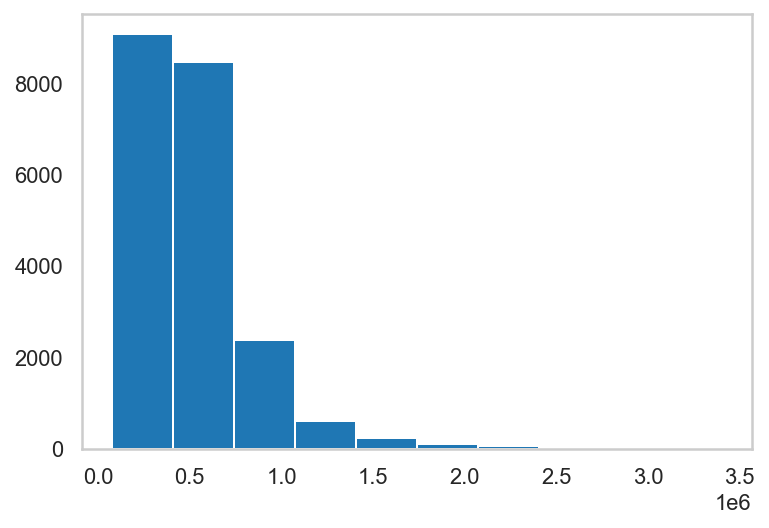

In [43]:
# Distribution of target values before applying log transform
plt.hist(data_out['price']);

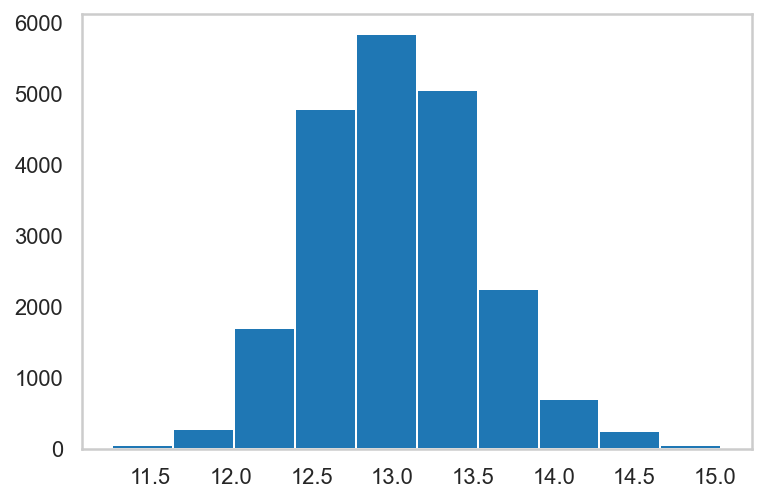

In [44]:
plt.hist(np.log(data_out['price']));

In [45]:
data_out['price'] = np.log(data_out['price'])
data_logged = data_out.copy()
data_logged.head()

price  bedrooms  bathrooms  sqft_living  floors  view  condition  \
0  12.309982         3       1.00    -0.980629     1.0     0          2   
1  13.195614         3       2.25     0.533357     2.0     0          2   
2  12.100712         2       1.00    -1.427201     1.0     0          2   
3  13.311329         4       3.00    -0.131054     1.0     0          4   
4  13.142166         3       2.00    -0.436030     1.0     0          2   

   grade  sqft_living15  sqft_lot15  renovated  age_at_sale  
0      7      -0.943654   -0.260621          0           59  
1      7      -0.432877   -0.187695          1           63  
2      6       1.070267   -0.172186          0           82  
3      7      -0.914467   -0.284453          0           49  
4      8      -0.272347   -0.192682          0           28

- Now let's see our final model one more time with logged price

In [46]:
X_final = data_logged.drop(['price'],axis =1)
y_final= data_logged['price']

X_final_sm = sm.add_constant(X_final)
final_model_sm = sm.OLS(y_final,X_final_sm).fit()
final_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3208.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:24:33   Log-Likelihood:                -5144.0
No. Observations:               20928   AIC:                         1.031e+04
Df Residuals:                   20916   BIC:                         1.041e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.9178      0.031    347.632      0.000      10.856      10.979
bedrooms         -0.0342      0.003    -10.603      0.000      -0.041      -0.028
bathrooms         0.0887      0.005     17.280      0.000       0.079       0.099
sqft_living       0.1450      0.005     27.194      0.000       0.135       0.155
floors            0.0836      0.005     16.460      0.000       0.074       0.094
view              0.0636      0.003     20.399      0.000       0.058       0.070
condition         0.0469      0.004     12.949      0.000       0.040       0.054
grade             0.2027      0.003     61.280      0.000       0.196       0.209
sqft_living15     0.0681      0.004     18.313      0.000       0.061       0.075
sqft_lot15       -0.0733      0.007    -11.213      0.000      -0.086      -0.060
renovated         0.0373      0.012      3.001      0.003       0.013       0.062
age_at_sale       0.0057      0.000     55.606      0.000       0.005       0.006
==============================================================================
Omnibus:                       60.476   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.266
Skew:                          -0.117   Prob(JB):                     3.01e-14
Kurtosis:                       3.129   Cond. No.                         789.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
X_final_train,X_final_test,y_final_train,y_final_test = train_test_split(X_final,y_final,random_state= 10)

final_model = LinearRegression()
final_model.fit(X_final_train, y_final_train)

print("final model R-squared on testing:", round(final_model.score(X_final_test, y_final_test),4))
print("final model R-squared on training:", round(final_model.score(X_final_train, y_final_train),3))

predictions = final_model.predict(X_final_test)
RMSE = mean_squared_error(y_final_test,predictions, squared=False) # False returns RMSE value
print('final model RMSE: ',round(RMSE, 2))

final model R-squared on testing: 0.6239
final model R-squared on training: 0.629
final model RMSE:  0.31



The RMSE is a measure for how "wrong" a regression model's predictions are on average, and is mostly useful as a relative metric for determining which of a set of models is best.

On our final model we got 0.31 RMSE value which is more meaningful error measure is root mean square logarithmic error, which is the RMSE after taking the log of 𝑦 value. The reason for this is that we're interested in errors as proportions of our target (an error of $50,000 is much more serious for a $100,000 house compared to a $1,000,000 house), and taking logs is the way to adjust for this.

in this case we can say that 0.31 shows that the model can relatively predict the data accurately.



In [48]:
# non_log_RMSE = mean_squared_error(10**(y_final_test),10**(predictions))
# np.sqrt(non_log_RMSE)

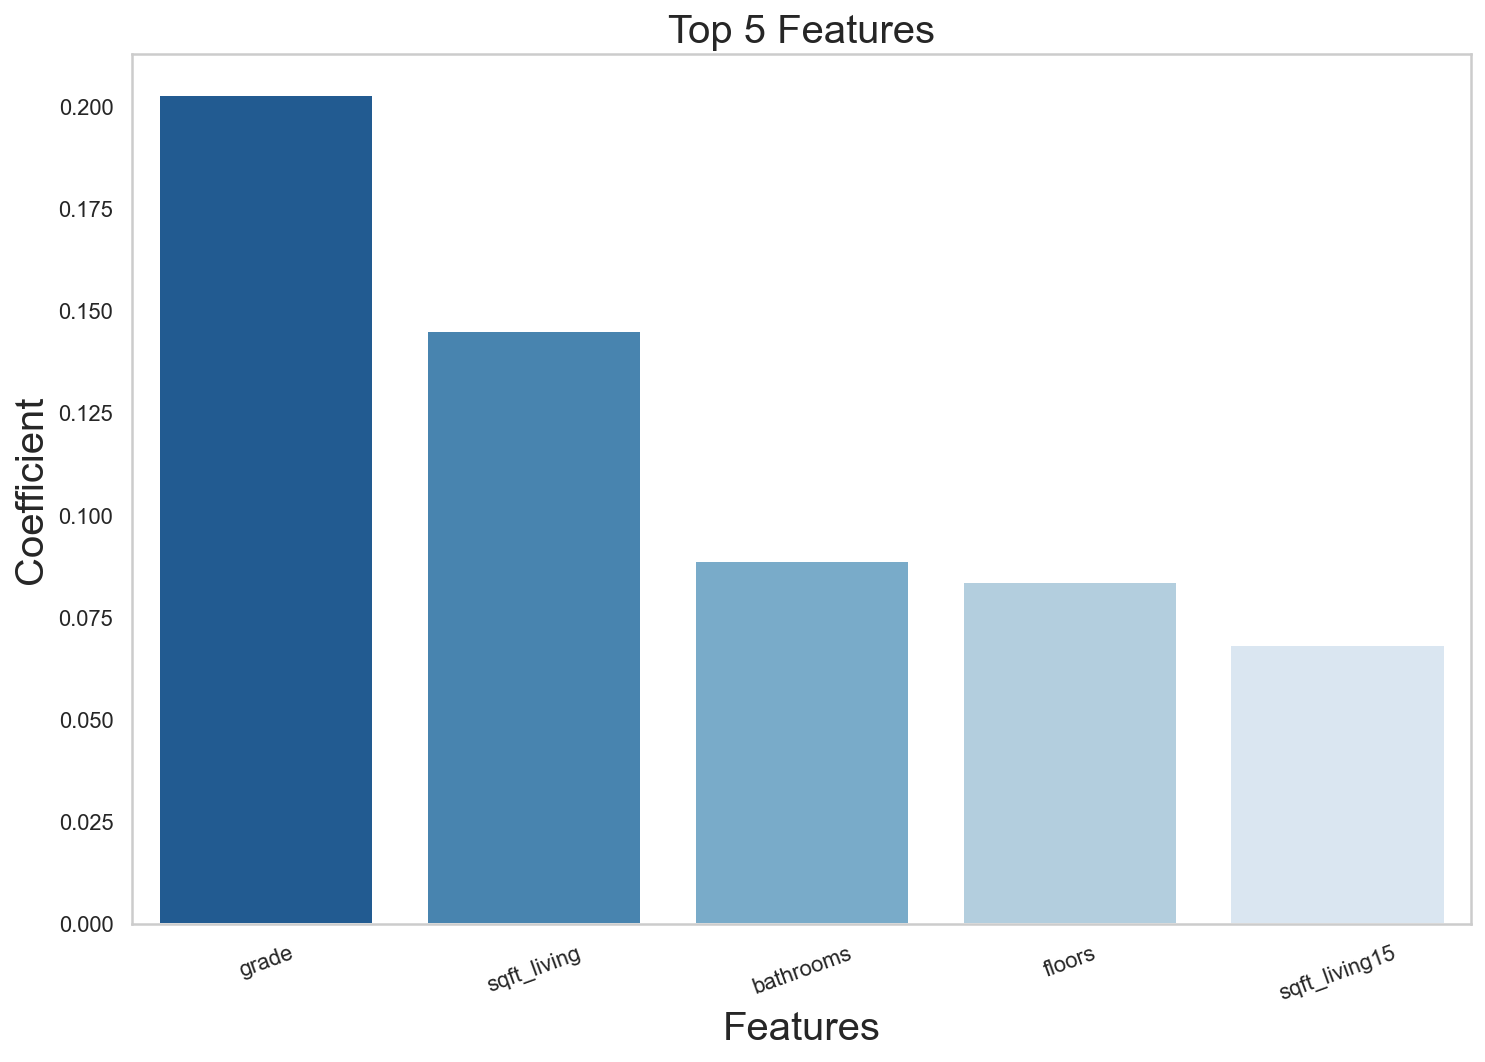

In [49]:
#Plotting the features with the highest coefficients 
sns.set_style("whitegrid", {'axes.grid' : False})
coef_top_5 = final_model_sm.params.sort_values(ascending=False).head(6)

model_coef =pd.DataFrame(coef_top_5, columns =['coefficient'])
model_coef.drop('const', axis=0, inplace= True)
plt.figure(figsize = (12,8))
a= sns.barplot(data=model_coef, x=model_coef.index, y= 'coefficient', palette="Blues_r")
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.title('Top 5 Features', size=20)
plt.xticks(rotation=20);
plt.savefig('Top 5 Features.png', dpi=100, bbox_inches='tight')


#### Final Model Assumptions Checking

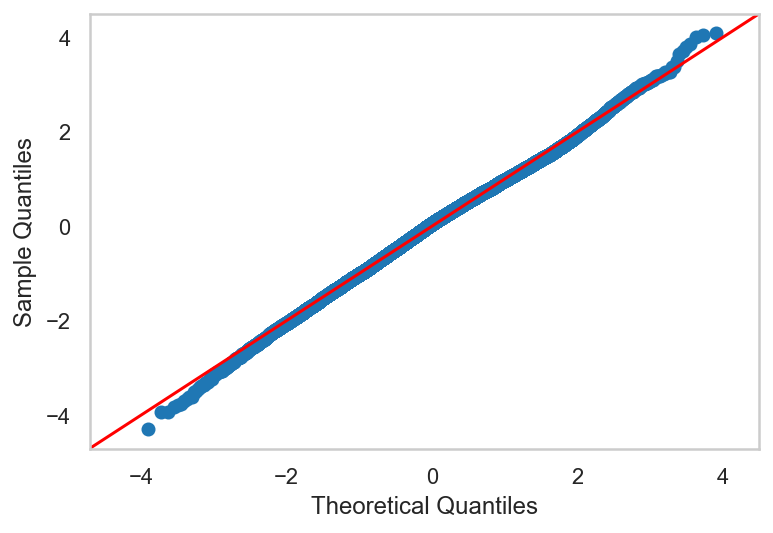

In [50]:
fig = sm.qqplot(final_model_sm.resid, dist=stats.norm, line='45', fit=True);

- The final model met linearity assumption

eval_env: 1


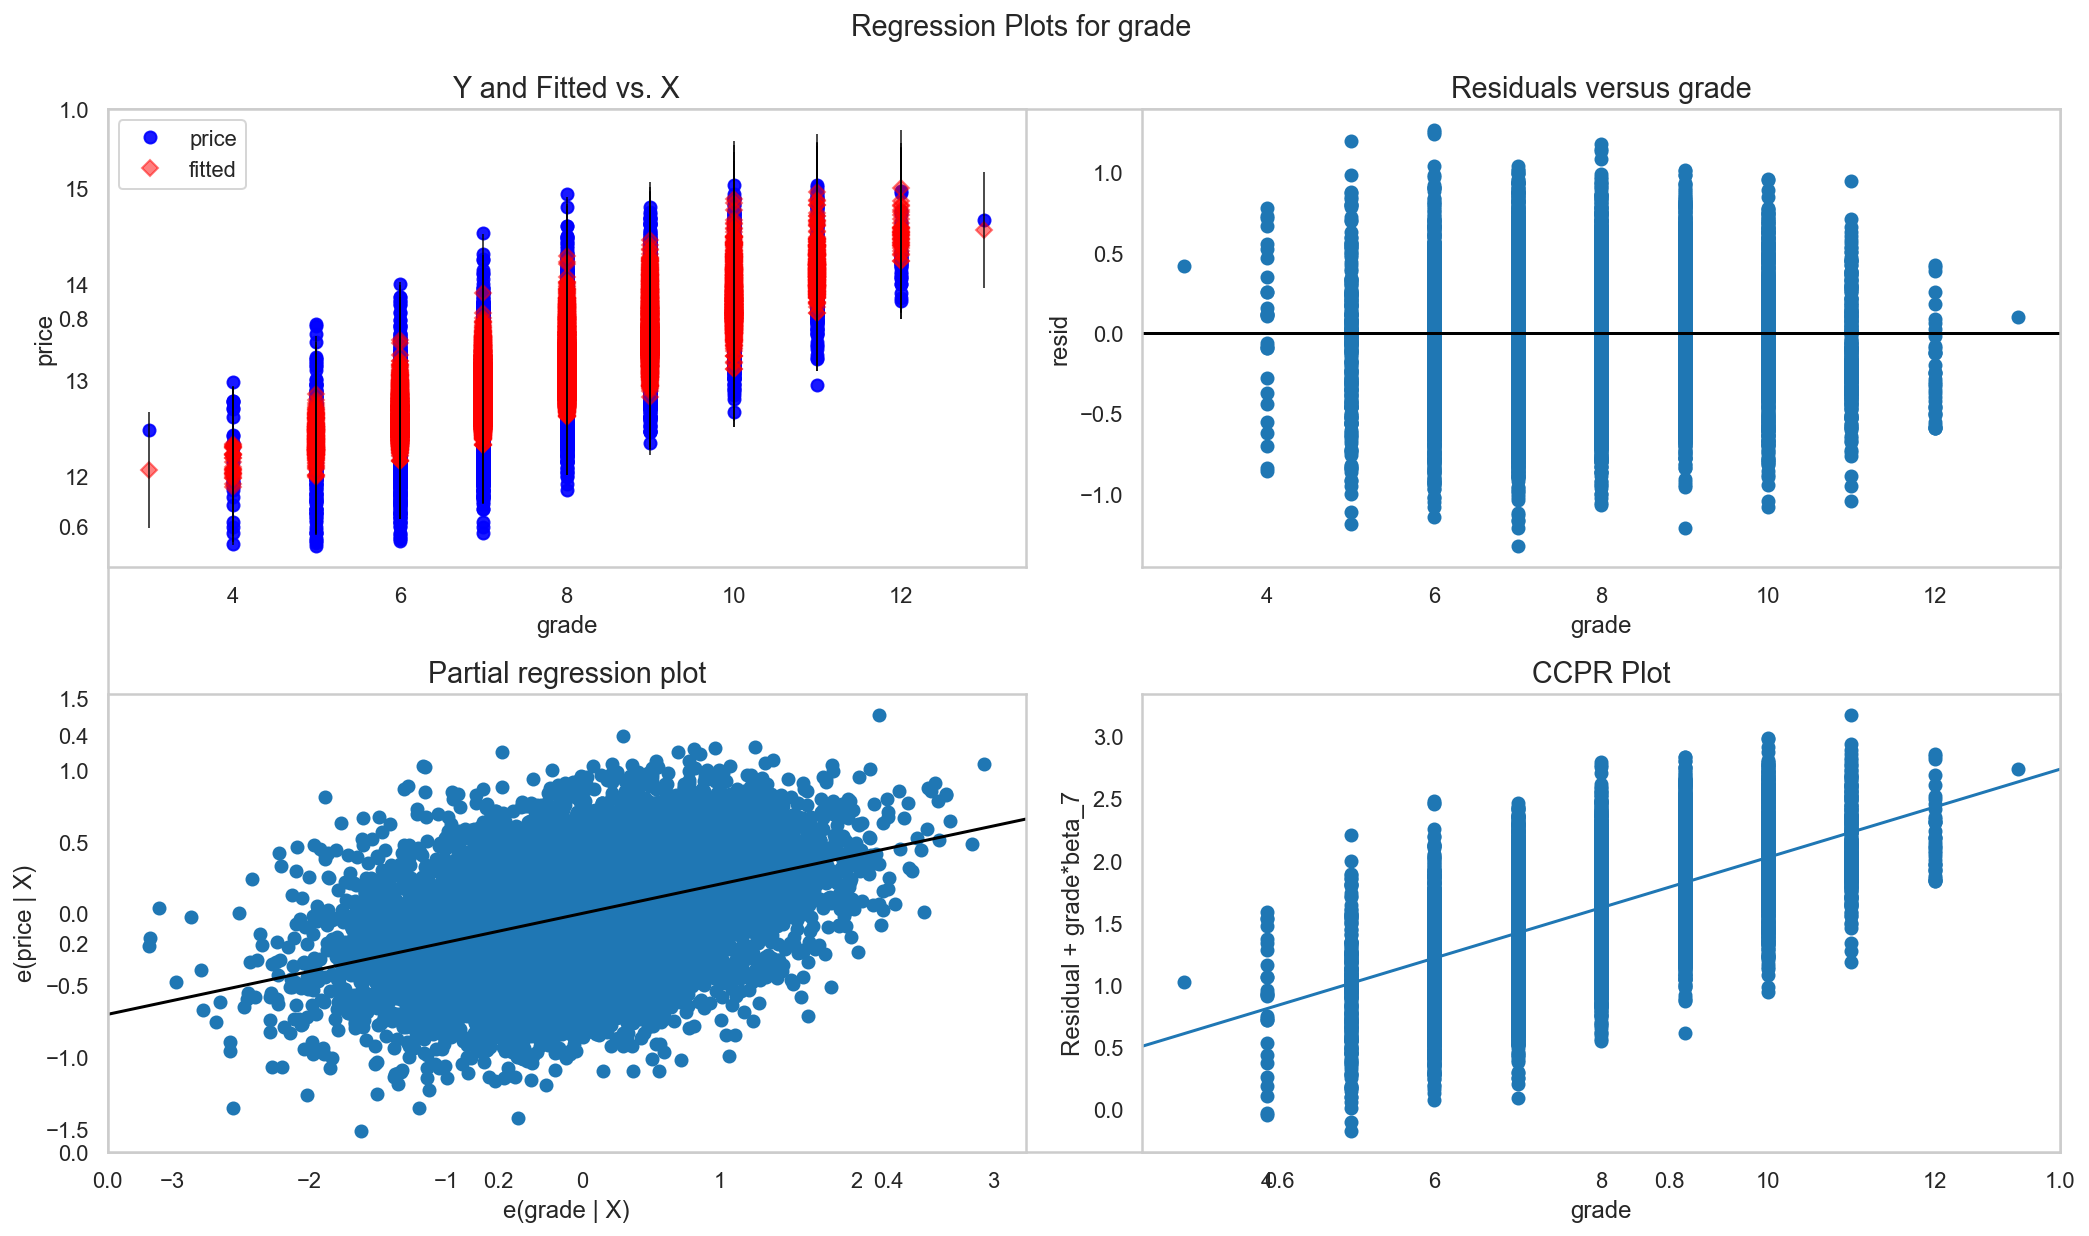

In [51]:
fig ,ax = plt.subplots(figsize = (15,9));
fig = sm.graphics.plot_regress_exog(final_model_sm,'grade', fig=fig);
fig.tight_layout()
plt.savefig('Regression Plot for grade.png', dpi=100, bbox_inches='tight')

- Grade is corraleted with target,
- Residuals are somewhat homoskedastic

In [52]:
fig ,ax = plt.subplots(figsize = (15,9));
fig = sm.graphics.plot_regress_exog(final_model_sm,'sqft_living', fig=fig);
# fig = sm.qqplot(final_model_sm.resid, dist=stats.norm, line='45', fit=True);
fig.tight_layout()
plt.savefig('Regression Plot for sqft_living.png', dpi=100, bbox_inches='tight')

eval_env: 1


- sqft_living is corraleted with target 
- residuals are somewhat homoskedastic

eval_env: 1


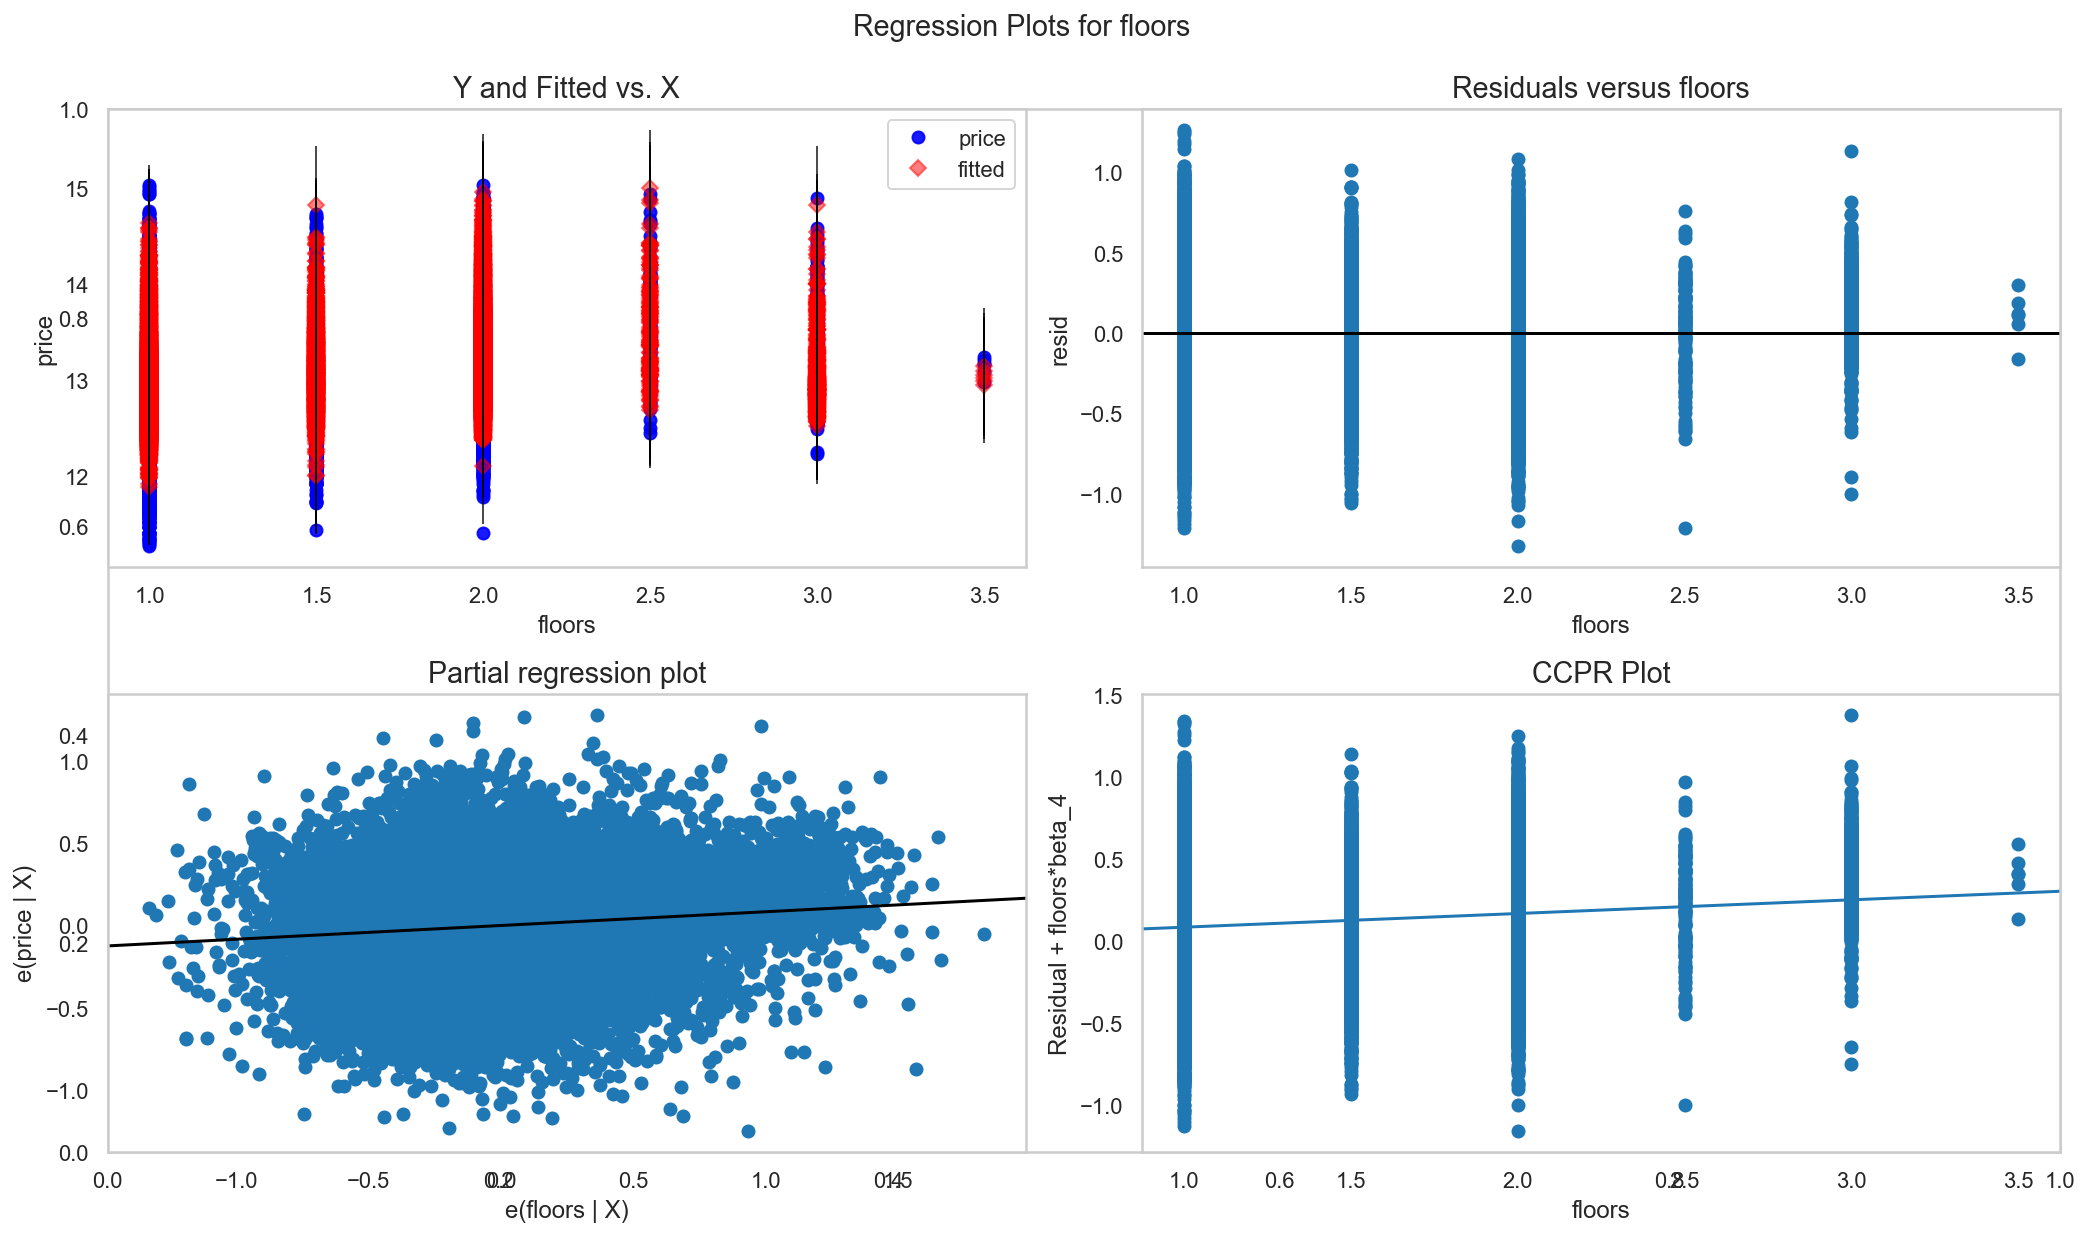

In [53]:
fig ,ax = plt.subplots(figsize = (15,9));
fig = sm.graphics.plot_regress_exog(final_model_sm,'floors', fig=fig);
# fig = sm.qqplot(final_model_sm.resid, dist=stats.norm, line='45', fit=True);
fig.tight_layout()
plt.savefig('Regression Plot for floors.png', dpi=100, bbox_inches='tight')

- residuals are not homoskedastic

eval_env: 1


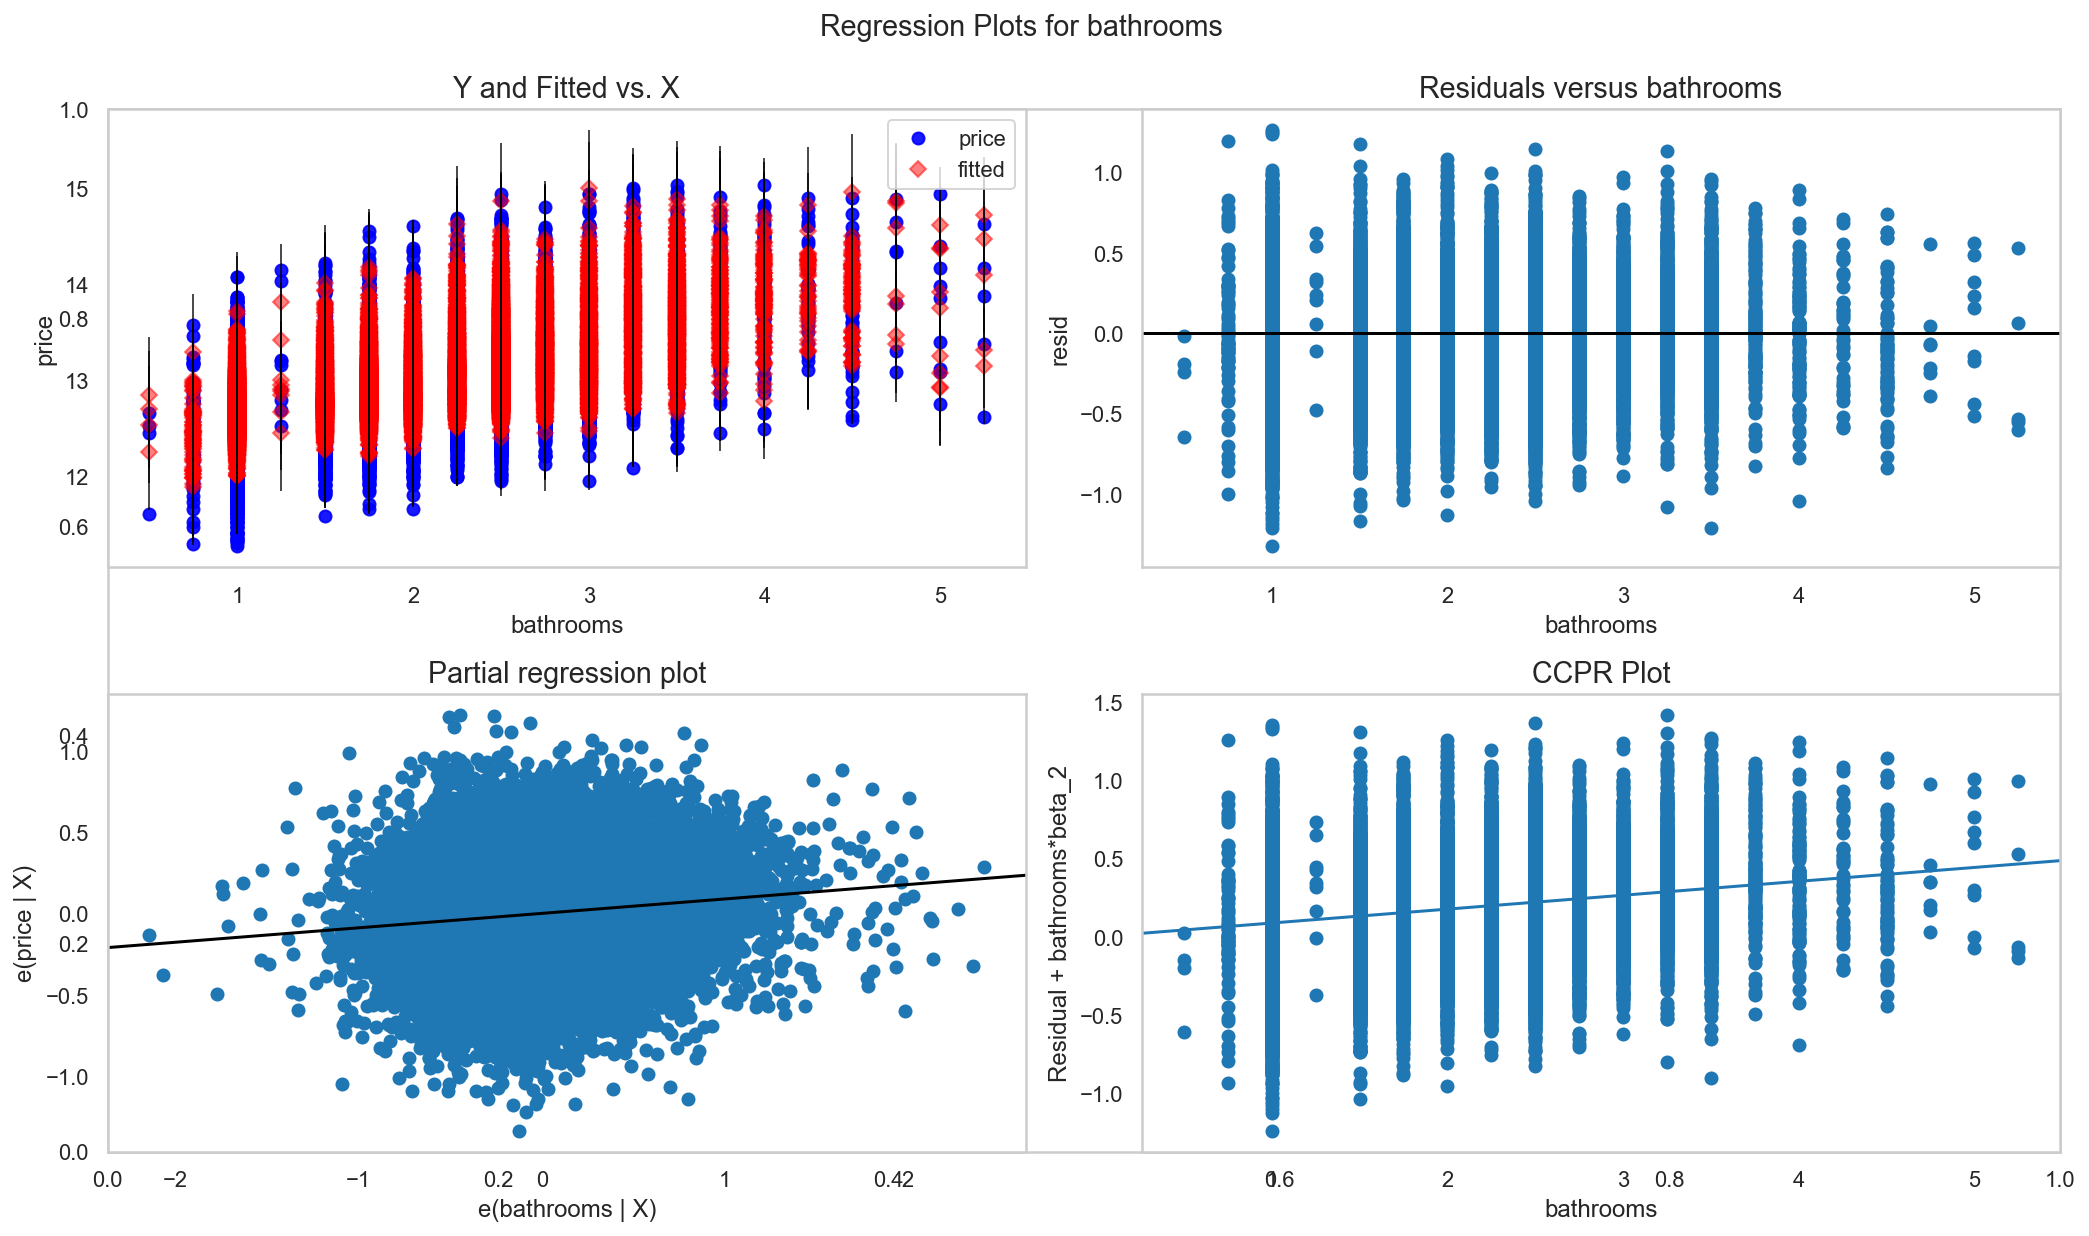

In [54]:
fig ,ax = plt.subplots(figsize = (15,9));
fig = sm.graphics.plot_regress_exog(final_model_sm,'bathrooms', fig=fig);
# fig = sm.qqplot(final_model_sm.resid, dist=stats.norm, line='45', fit=True);
fig.tight_layout()
plt.savefig('Regression Plot for bathrooms.png', dpi=100, bbox_inches='tight')

eval_env: 1


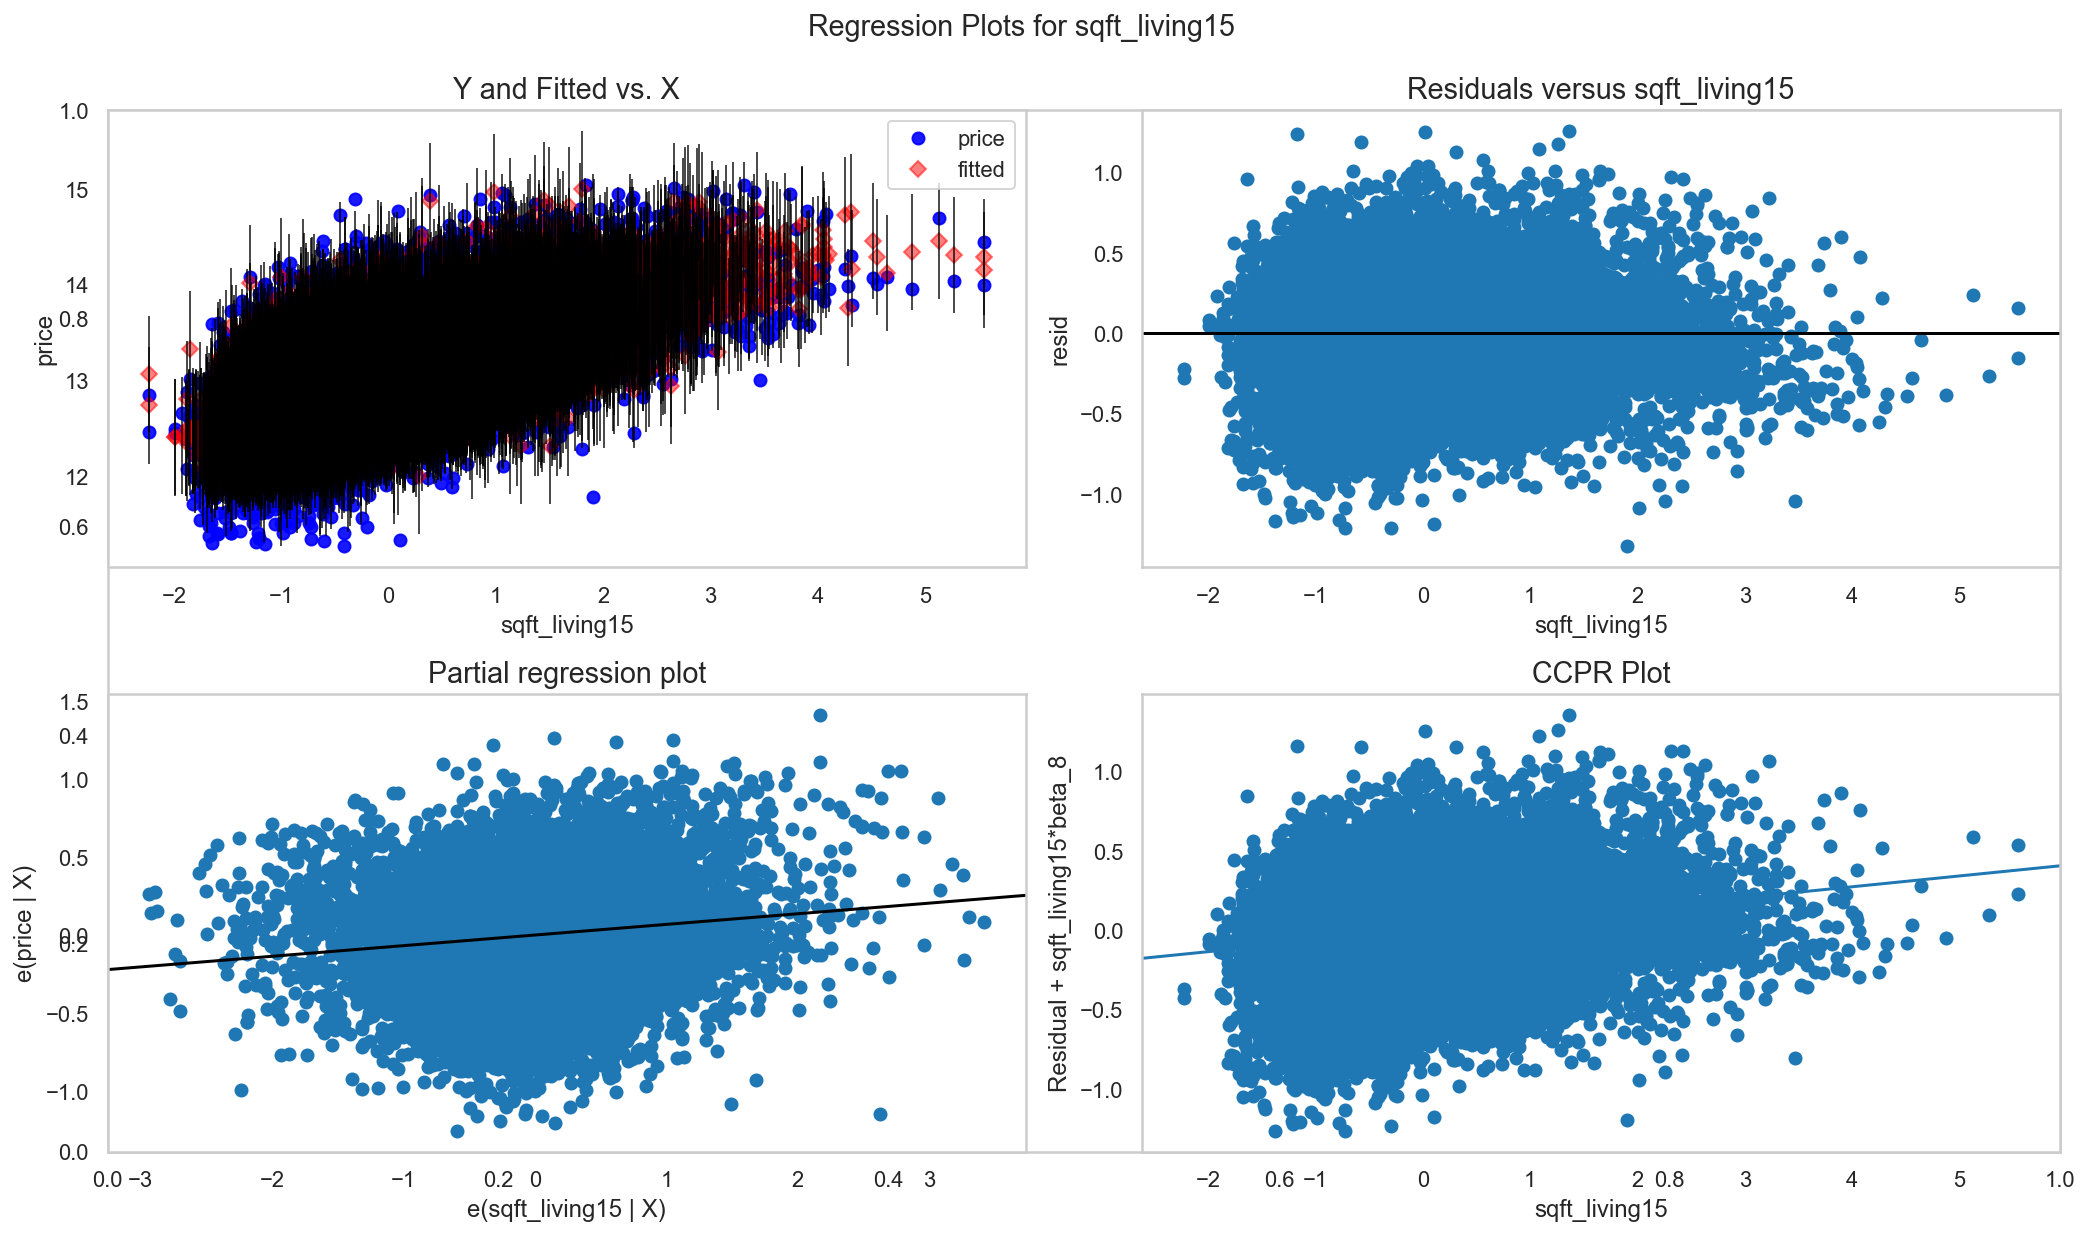

In [55]:
fig ,ax = plt.subplots(figsize = (15,9));
fig = sm.graphics.plot_regress_exog(final_model_sm,'sqft_living15', fig=fig);
# fig = sm.qqplot(final_model_sm.resid, dist=stats.norm, line='45', fit=True);
fig.tight_layout()
plt.savefig('Regression Plot for sqft_living15.png', dpi=100, bbox_inches='tight')

- sqft_living is corraleted with target
- residuals are not homoskedastic

The `floors`,`bathrooms`,`sqft_living15` variables are not homoscedastic by the graphs above meaning the variance decrease as the independent variable gets bigger

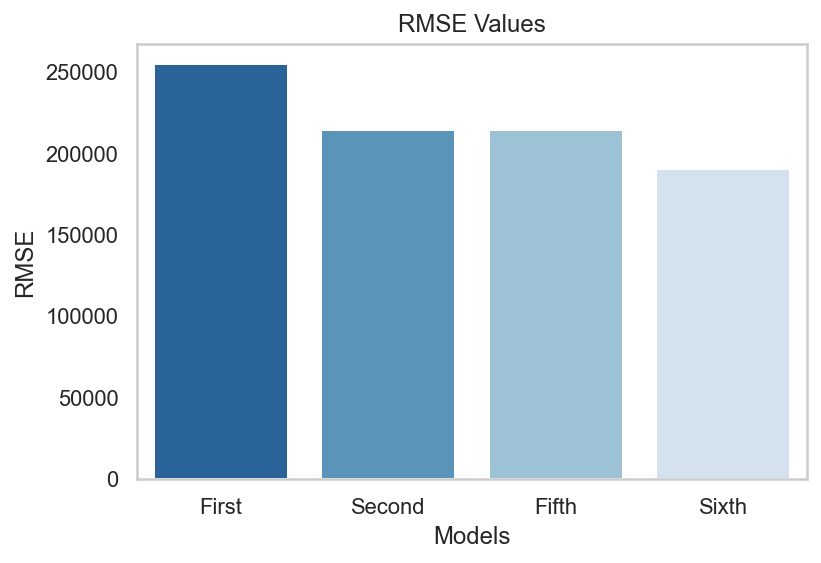

In [56]:
RMSE_values = [254336,213794,213860,190414]
models =['First', 'Second','Fifth','Sixth']


plt.bar(models, height=RMSE_values)
plt.title('RMSE Values')
plt.xlabel('Model name');
sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(x=models, y=RMSE_values, palette='Blues_r').set(title='RMSE Values', 
                                                                    xlabel='Models', ylabel='RMSE');
plt.savefig('RMSE Values.png', dpi=100, bbox_inches='tight')

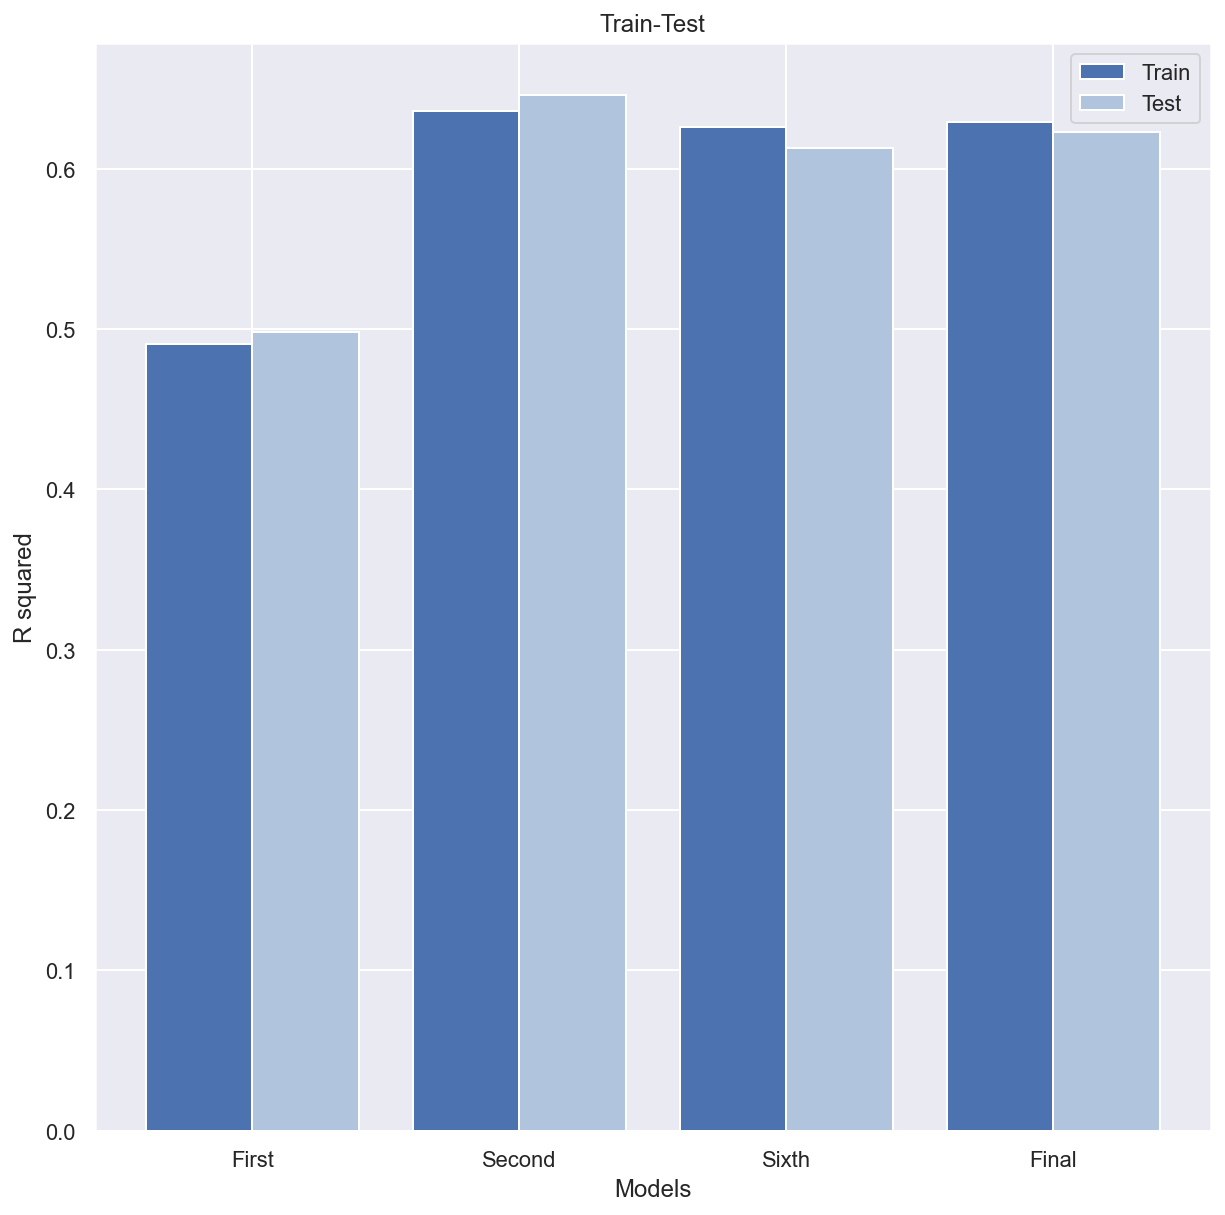

<Figure size 720x720 with 0 Axes>

In [57]:
R2_on_train = [0.491,0.636,0.626,0.629]
R2_on_test = [0.498,0.646,0.613,0.623]
models=['First', 'Second','Sixth','Final']

X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, R2_on_train, 0.4, label = 'Train' ,color = 'b')
plt.bar(X_axis + 0.2, R2_on_test, 0.4, label = 'Test', color = 'lightsteelblue')
  
plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.ylabel("R squared")
plt.title("Train-Test")

sns.set(rc = {'figure.figsize':(10,10)})

plt.legend()
plt.show()

plt.savefig('R Squared Train-Test.png', dpi=100, bbox_inches='tight')

This is a healthy looking difference between our Train and Test scores.On final model the Train score is slightly higher, we can identify that our model is slightly overfit. But the difference between the two scores does not seem too high so our model seems to be able to be more general/holistic in its inference based on its performance with the test data.

In [58]:
data_logged.head()

price  bedrooms  bathrooms  sqft_living  floors  view  condition  \
0  12.309982         3       1.00    -0.980629     1.0     0          2   
1  13.195614         3       2.25     0.533357     2.0     0          2   
2  12.100712         2       1.00    -1.427201     1.0     0          2   
3  13.311329         4       3.00    -0.131054     1.0     0          4   
4  13.142166         3       2.00    -0.436030     1.0     0          2   

   grade  sqft_living15  sqft_lot15  renovated  age_at_sale  
0      7      -0.943654   -0.260621          0           59  
1      7      -0.432877   -0.187695          1           63  
2      6       1.070267   -0.172186          0           82  
3      7      -0.914467   -0.284453          0           49  
4      8      -0.272347   -0.192682          0           28

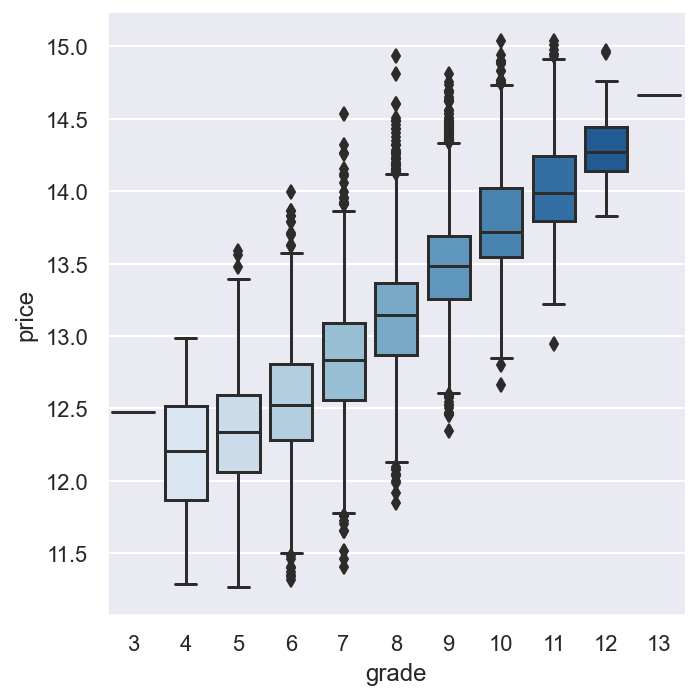

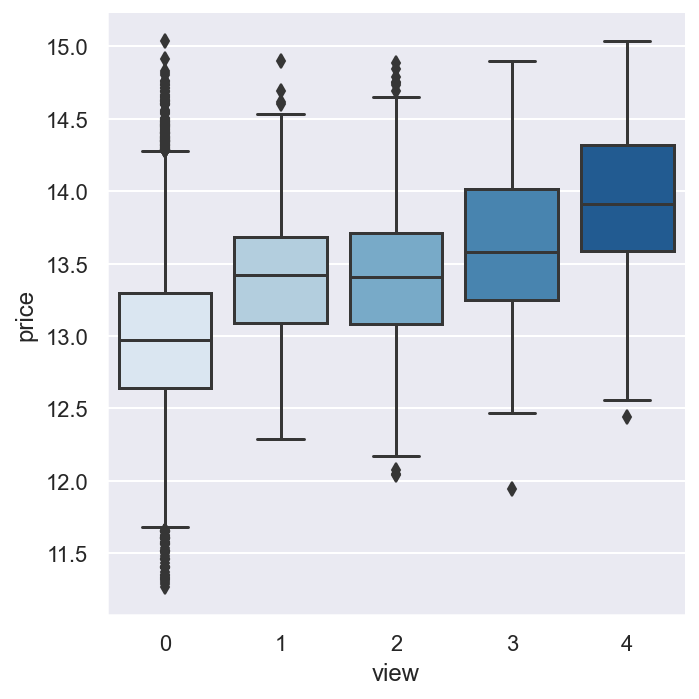

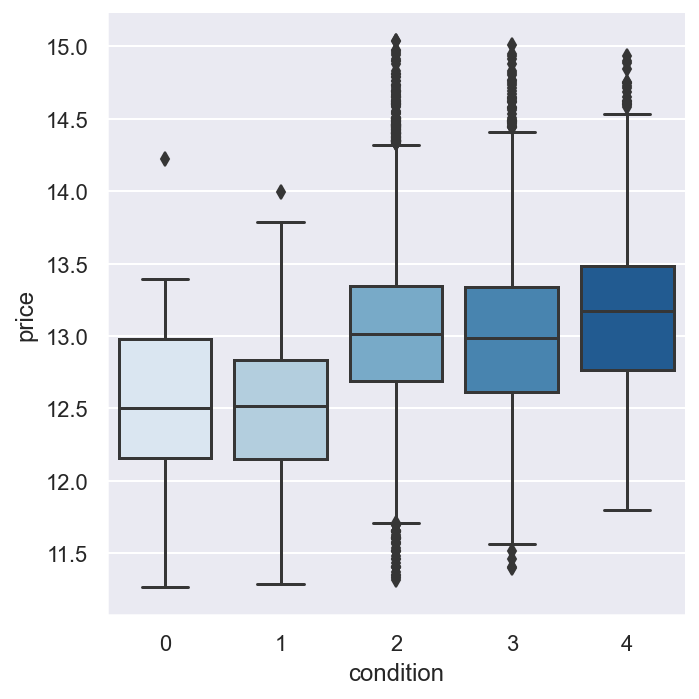

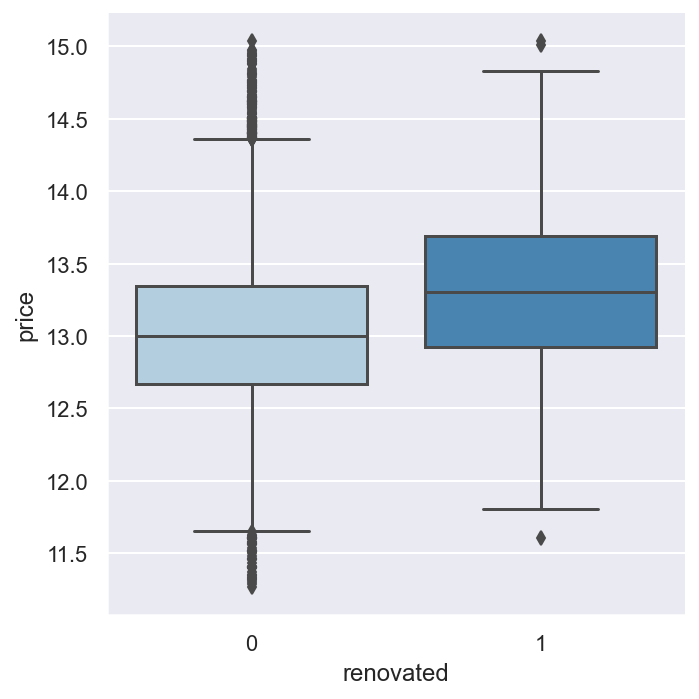

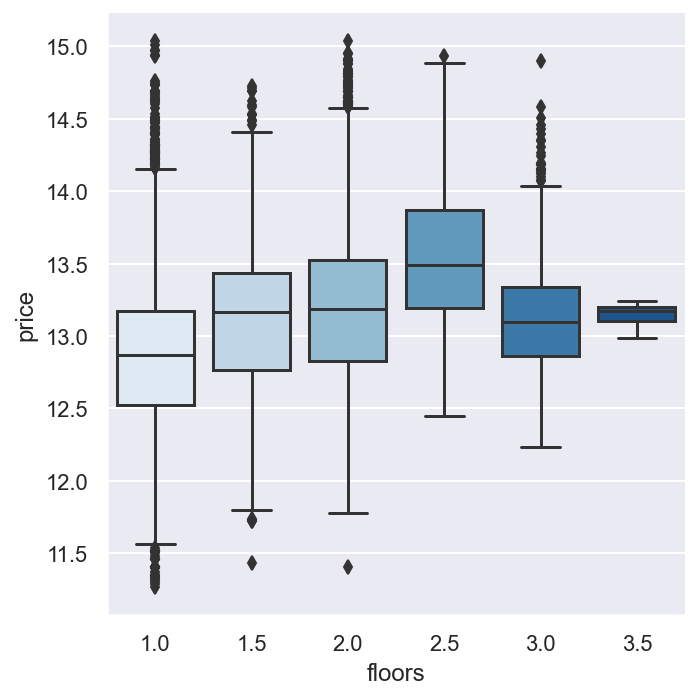

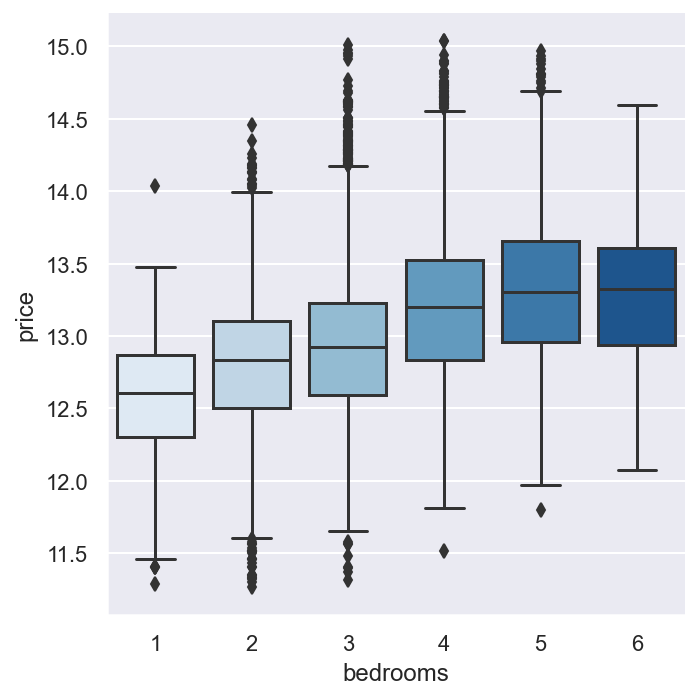

In [59]:
# Plotting final model's   categorical variables
sns.catplot(x='grade', y='price', data=data_logged,  kind='box', palette='Blues');
sns.catplot(x='view', y='price', data=data_logged,  kind='box', palette='Blues');
sns.catplot(x='condition', y='price', data=data_logged,  kind='box', palette='Blues');
sns.catplot(x='renovated', y='price', data=data_logged,  kind='box', palette='Blues');
sns.catplot(x='floors', y='price', data=data_logged,  kind='box', palette='Blues');
sns.catplot(x='bedrooms', y='price', data=data_logged,  kind='box', palette='Blues');

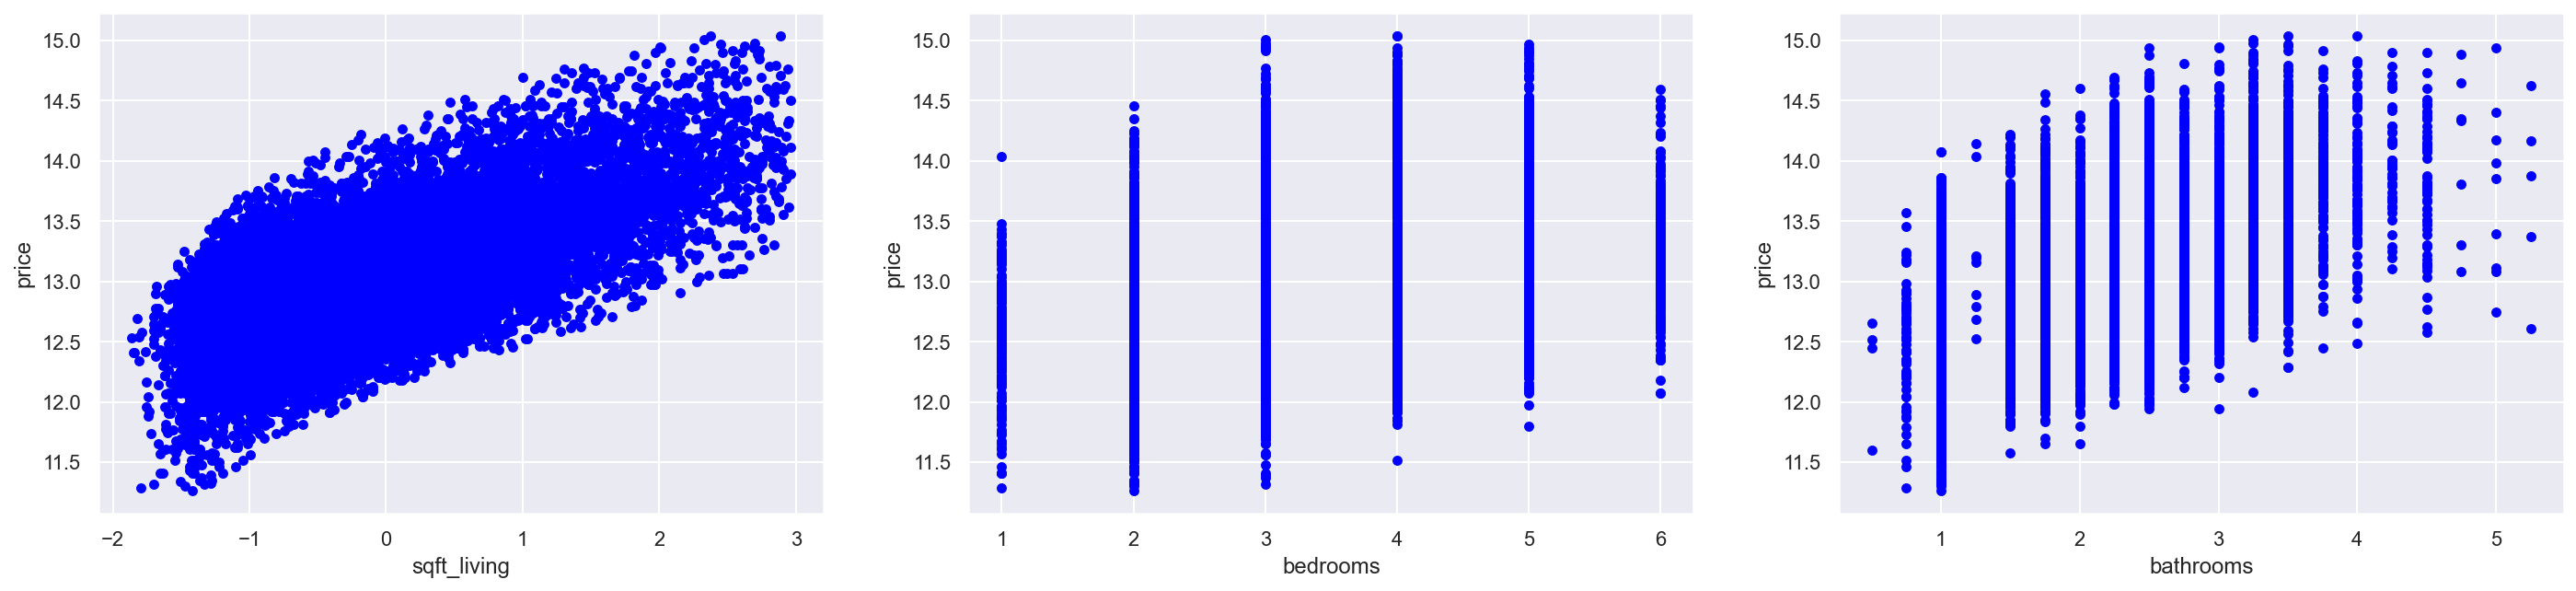

In [60]:
# Plotting continuous variables of the final model
fig, ax = plt.subplots(ncols=3,figsize=(24,5));
data_logged.plot.scatter(x='sqft_living', y='price', c='blue', ax=ax[0]);
data_logged.plot.scatter(x='bedrooms', y='price', c='blue', ax=ax[1]);
data_logged.plot.scatter(x='bathrooms', y='price', c='blue', ax=ax[2]);

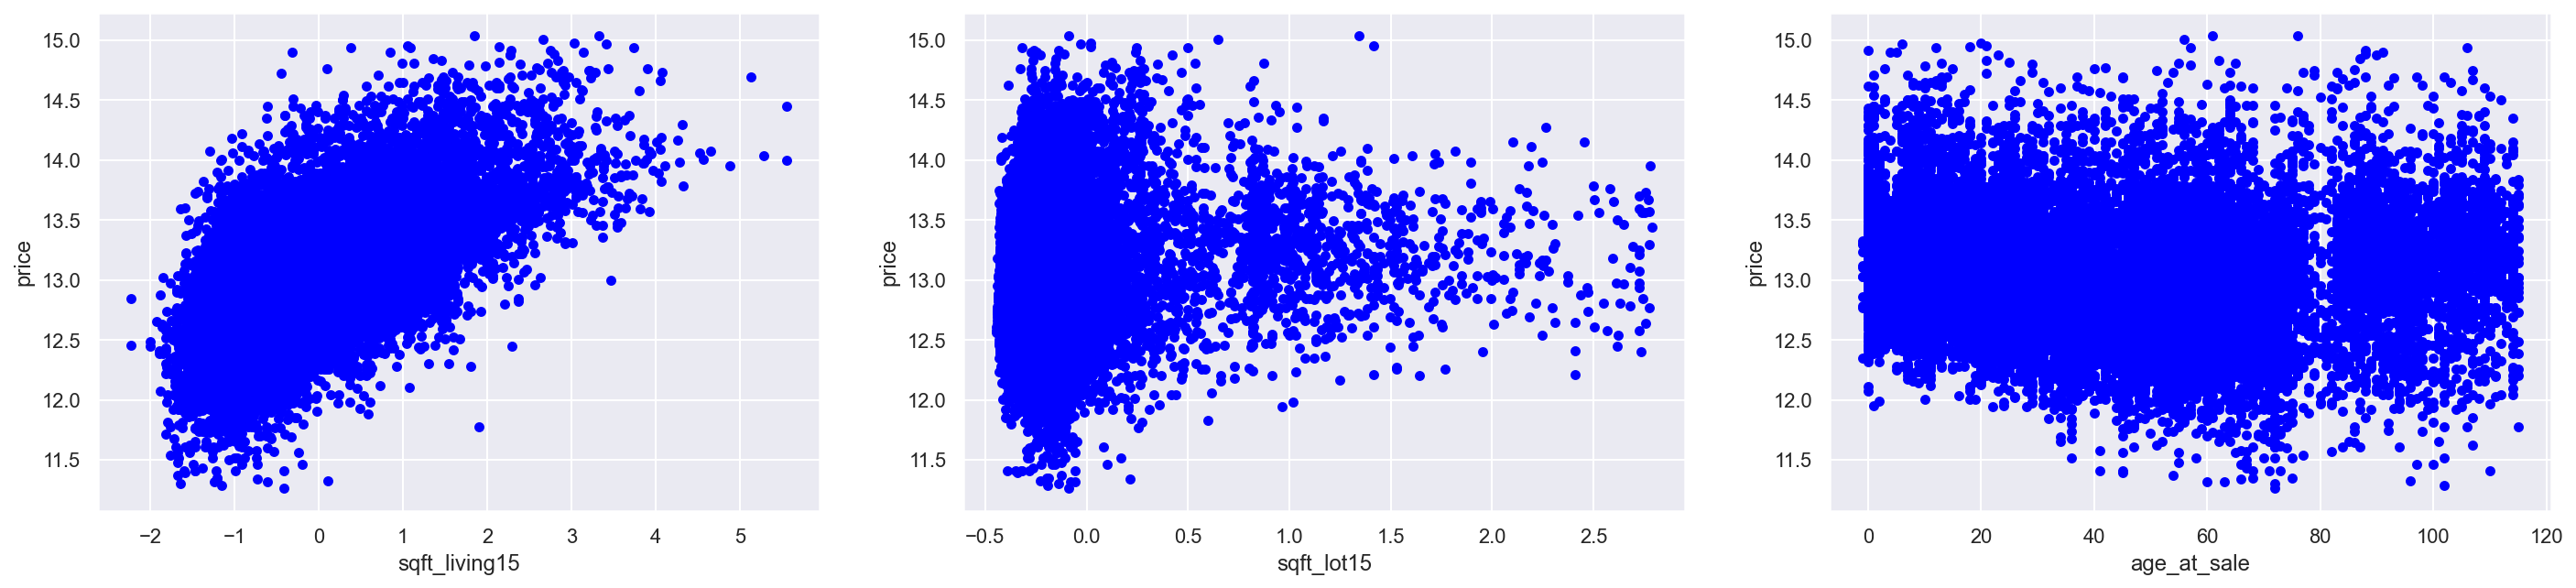

In [61]:
fig, ax = plt.subplots(ncols=3,figsize=(24,5));
data_logged.plot.scatter(x='sqft_living15', y='price', c='blue', ax=ax[0]);
data_logged.plot.scatter(x='sqft_lot15', y='price', c='blue', ax=ax[1]);
data_logged.plot.scatter(x='age_at_sale', y='price', c='blue', ax=ax[2]);

### Polynomial Regression

- Addition to that, I saw that the multiple linear regression alone didn't fit very well and R-squared value still seemed a bit low. So, I tried to use the PolynomialFeatures transformer from sklearn to see how R-squared improved

In [62]:
#create train test split
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)

#create model
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_final_train)
X_poly_test = poly.transform(X_final_test)
model_final = LinearRegression()
model_final.fit(X_poly_train, y_final_train)

#predict model
predict_final_train = model_final.predict(X_poly_train)
predict_final_test = model_final.predict(X_poly_test)
mse = mean_squared_error(y_final_test, predict_final_test)

#score model
train_final_score = model_final.score(X_poly_train, y_final_train)
test_final_score = model_final.score(X_poly_test, y_final_test)

train_final_score, test_final_score, mse


print(f'Train Final Score: {round((train_final_score),4)}\nTest Final Score: {round((test_final_score),4)}\nRoot Mean Squared Error: ${round(np.sqrt(mse),2)}')


Train Final Score: 0.6634
Test Final Score: 0.6642
Root Mean Squared Error: $0.3


# Conclusion

### Model Summary

For optimal final inferential model I tried keep the most influential predictors only. However, our model is not perfect. Its coefficient of determination: R-squared is 0.628. Since we are working with real-world data that is inherently noisy, this is not a bad value.

#### Interpreting Regression Coefficients

After analyzing this King County data, our final model would suggest the main factors in increasing property value to be it’s `grade` , `age of sale` , `sqft_living` of the property as well as `batrooms`, `floors`.

The sign of a regression coefficient indicates whether there is a positive or negative correlation between each independent variable and the dependent variable in the model. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.

Thus when we increase the features with one unit the price will increase in the following way:

- grade: `+20.27%` 
- age_at_sale: `+16.73%` 
- sqft_living: `+14.50%`
- bathrooms: `+8.87%`
- floors: `+8.36%` 

And also when we increase the features with one unit the price will decrease in the following way:

- bedrooms: `-3,42%`
- sqft_lot15: `-7.33%`


Suprisingly I had bedrooms has negatif coefficient. it might be because of bathroom and bedroom are interacting features.

#### Interpreting RMSE values

The RMSE is a measure for how "wrong" a regression model's predictions are on average, and is mostly useful as a relative metric for determining which of a set of models is best.

On our final model we got 0.31 RMSE value which is more meaningful error measure is root mean square logarithmic error, which is the RMSE after taking the log of 𝑦 value. The reason for this is that we're interested in errors as proportions of our target (an error of 50,000 is much more serious for 100,000 house compared to a $1,000,000 house) and taking logs is the way to adjust for this.

in this case we can say that 0.31 shows that the model can relatively predict the data accurately.


Our final models R squared was 63% with an RMSE of 0.3. Linear regression was probably not the best tool to use to get the most out of this data set so in the future we would like to use different more powerful machine learning tools in order to make this a more accurate inferential model.

#### Recommendations

1. Grade is referring to the classification based on a structures construction quality. This mainly has to do with the types of materials used and the quality of the work done. Trying to get at least grade 8 which is an average in construction and design according to the King County Department of Assessment. It can be achieved by using better materials in both the exterior and interior finishes. As grade increases, the house price tends to be grow.

2. Most preferable house floor(levels) can be reached up to 2.5 in order to stay increased in price. Houses with floors(levels) between 3-3.5 are not desirable since prices getting sharply decreasing.

3. Increasing the square footage of the living area along with the square footage of interior housing living space for the nearest 15 neighbors will also tend positively effects the price increase

4. Renovating house impacts positively its value.

#### Next Step

Based on the adjusted R-squared we got more than 35% of the variance in housing prices cannot be explained by the selected principal components.In Future analysis I would like to add more features such house locations, demographics , security of a neighborhood etc to our regression model.

Also I would like to apply machine learning tools on future home sales to find a better fit model.